# 🐍 **Introducción a Python para el Análisis de Datos**<br>

### 👨‍💻 Jorge Gómez Galván
* LinkedIn: [linkedin.com/in/jorgeggalvan/](https://www.linkedin.com/in/jorgeggalvan/) 
* E-mail: gomezgalvanjorge@gmail.com

## **Capítulo 6: Visualización de Datos**
---

En este notebook se exploran las opciones avanzadas de visualización de datos con Python, haciendo uso principalmente de Matplotlib y Seaborn, dos de las librerías más relevantes en este ecosistema. De esta manera, se aborda la representación de los principales tipos de gráficos, como gráficos de barras, líneas, dispersión y mapas de calor, entre otros.

*El notebook ha sido adaptado a partir del trabajo de Juan Martín Bellido, cuyo contenido original se encuentra en [este enlace](https://github.com/jmartinbellido/Python-Curso-Introductorio/blob/main/Capitulo%206%20Visualizacion.ipynb).*

### Índice
---

[1. Primeros pasos con Matplotlib y Seaborn](#6.1---Primeros-pasos-con-Matplotlib-y-Seaborn)  
[2. Gráficos de barras](#6.2---Gráficos-de-barras)  
[3. Gráficos de series temporales](#6.3---Gráficos-de-series-temporales)  
[4. Gráficos bidimensionales](#6.4---Gráficos-bidimensionales)  
[5. Gráficos circulares](#6.5---Gráficos-circulares)  
[6. Gráfico de Waffle](#6.6---Gráfico-de-Waffle)  
[7. Mapa de calor](#6.7---Mapa-de-calor)  
[8. Gráfico de radar](#6.8---Gráfico-de-radar)  
[9. Nube de palabras](#6.9---Nube-de-palabras)  
[10. Combinación de gráficos](#6.10---Combinación-de-gráficos)  
[11. Exportar gráficos](#6.11---Exportar-gráficos)  
[12. Ejercicios](#6.12---Ejercicios)  

### 6.1 - Primeros pasos con Matplotlib y Seaborn
---

Matplotlib y Seaborn son dos de las librerías más importantes para la visualización de datos en Python. Mientras que Matplotlib proporciona un control detallado para crear gráficos desde cero, Seaborn, que está construido sobre Matplotlib, simplifica la generación de gráficos complejos con menos líneas de código. Al combinar ambas librerías, se forma un base sólida para la creación de visualizaciones en Python.

In [1]:
# Importamos las librerías Matplotlib y Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

### 6.2 - Gráficos de barras
---

Los gráficos de barras son una representación visual que utiliza barras rectangulares para comparar datos entre categorías. La longitud de cada barra es proporcional al valor que representa.

#### Gráfico de barras verticales

Los gráficos de barras verticales o gráficos de columnas son los más comunes y consisten en barras alineadas de arriba a abajo en función de un eje x categórico y un eje y cuantitativo.

##### Gráfico de barras verticales básico

La sintaxis básica de Seaborn para crear un gráfico de barras verticales es:

> ```python
> sns.barplot(df, x='categorical_column', y='numeric_column')
> ```

Además, con Matplotlib, es posible personalizar varios aspectos del gráfico, como el tamaño del gráfico, el título, las etiquetas de los ejes o la orientación de los valores de los ejes.

> ```python
> plt.figure(figsize=(width, height)) # Ajustar el tamaño del gráfico
> ```

> ```python
> plt.title('Chart title') # Agregar título
> ```

> ```python
> plt.xlabel('Category label') # Agregar etiqueta al eje x
> plt.ylabel('Value label') # Agregar etiqueta al eje y
> ```

> ```python
> plt.xticks(rotation=rotation_angle) # Rotar los valores del eje x
> plt.yticks(rotation=rotation_angle) # Rotar los valores del eje y
> ```

In [2]:
# Importamos Pandas
import pandas as pd

In [3]:
# Importamos un DataFrame
df_jamesbond = pd.read_csv('./data/james_bond.csv')

In [4]:
# Calculamos la suma total de 'Box Office' y 'Budget' para cada director, seleccionando los 5 primeros
top_directors = df_jamesbond.groupby('Director').agg({'Box Office':'sum', 'Budget':'sum'}).round(2)\
    .sort_values(by='Box Office', ascending=False)\
    .reset_index().head(5)

top_directors

Director  Box Office  Budget
0   Guy Hamilton      2057.2   111.8
1  Terence Young      1840.7    61.5
2     Sam Mendes      1669.0   376.5
3      John Glen      1662.8   294.1
4  Lewis Gilbert      1582.2   196.5

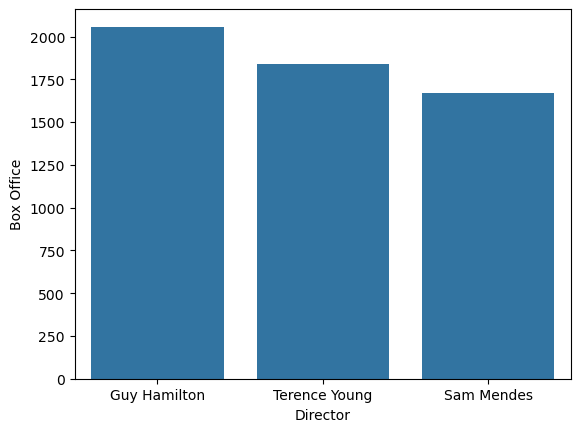

In [5]:
# Creamos un gráfico de barras de los tres directores con mayor 'Box Office'
sns.barplot(top_directors.head(3), x='Director', y='Box Office')
plt.show()

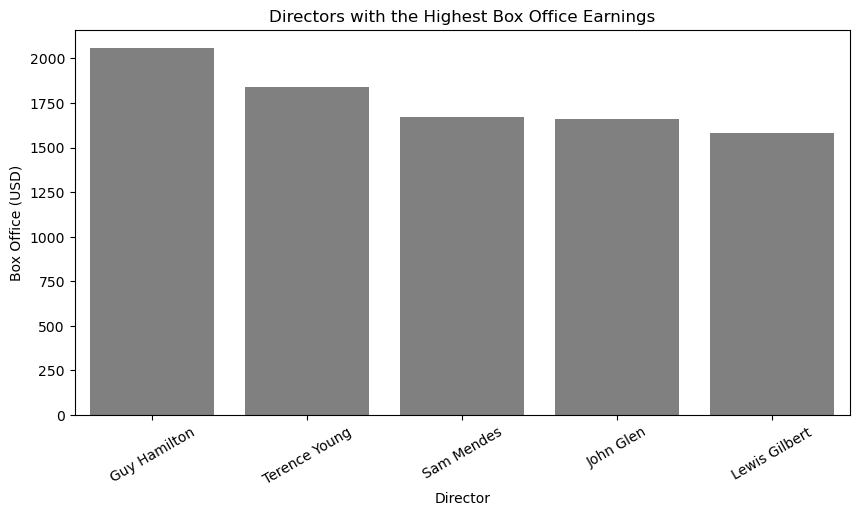

In [6]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos un gráfico de barras de los cinco directores con mayor 'Box Office'
sns.barplot(top_directors, x='Director', y='Box Office', color='grey')

# Añadimos el título al gráfico
plt.title('Directors with the Highest Box Office Earnings')
# Añadimos las etiquetas a los ejes
plt.xlabel('Director')
plt.ylabel('Box Office (USD)')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=30)

# Mostramos el gráfico
plt.show()

##### Gráfico de barras verticales avanzado

`sns.barplot` ofrece los parámetros `color` para definir el color de las barras, `edgecolor` para el color del borde, `width` para ajustar el grosor de las barras y `zorder` para controlar la superposición de los elementos en el gráfico.

Por otro lado, Matplotlib permite una personalización más avanzada, como la configuración de las fuentes mediante los parámetros `fontsize` (para definir el tamaño de la fuente), `fontweight` (para establecer el grosor de la fuente, como `'bold'`) y `family` (para especificar el tipo de fuente). 

Además, para personalizar el formato de los ejes, existe la clase `FuncFormatter` de Matplotlib.

> ```python
> plt.gca().yaxis.set_major_formatter(FuncFormatter(formatter))
> ```

👉 Si se desea añadir etiquetas personalizadas a las barras del gráfico, se puede usar un bucle como este:

> ```python
> for index, value in enumerate(df['numeric_column']):
>     plt.text(index, value, formatter, ha='center', va='bottom')
> ```

En cuanto a la visualización, también se puede modificar la cuadrícula del gráfico con `plt.grid()` y eliminar los bordes superiores y derecho con `sns.despine()`.

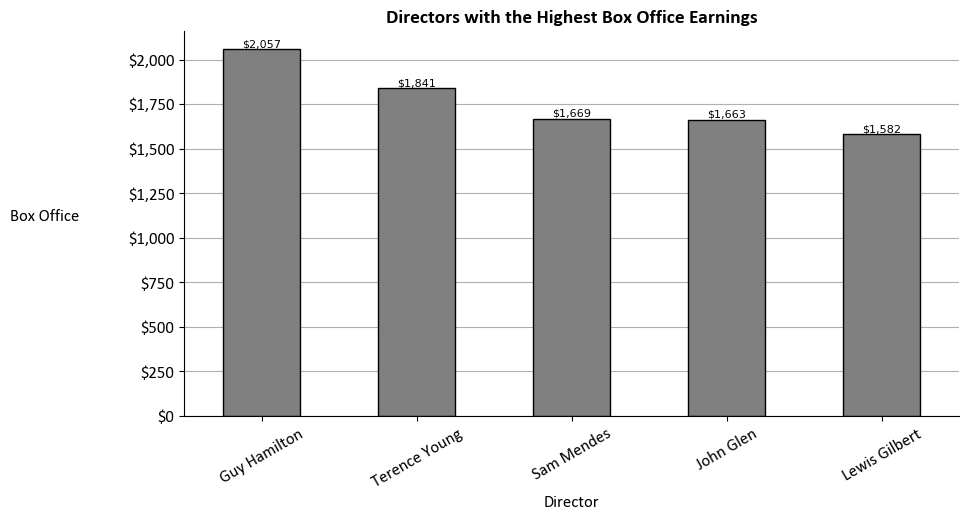

In [7]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos el gráfico de barras anterior, incluyendo bordes y ajustando el ancho de las barras
sns.barplot(top_directors, x='Director', y='Box Office', color='grey', edgecolor='black', width=0.5, zorder=2)

# Añadimos el título del gráfico
plt.title('Directors with the Highest Box Office Earnings', fontsize=14, fontweight='bold', family='Calibri')

# Configuramos las etiquetas de los ejes
plt.xlabel('Director', fontsize=12, family='Calibri')
plt.ylabel('Box Office', fontsize=12, family='Calibri', rotation=0, labelpad=60)

# Ajustamos la fuente de los ejes y la rotación de los valores del eje x
plt.xticks(fontsize=12, family='Calibri', rotation=30, ha='center')
plt.yticks(fontsize=12, family='Calibri')

# Añadimos los valores en cada barra
for index, value in enumerate(top_directors['Box Office']):
    plt.text(index, value, f'${value:,.0f}', ha='center', va='bottom', fontsize=8)

# Importamos el módulo 'FuncFormatter' de Matplotlib
from matplotlib.ticker import FuncFormatter
# Formateamos el eje y para añadir el símbolo del dolar a los valores
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Configuramos la cuadrícula del eje y
plt.grid(axis='y')

# Eliminamos el borde superior y derecho
sns.despine()

# Mostramos el gráfico
plt.show()

##### Gráfico de barras agrupadas

Para representar y comparar más de una variable dentro de cada grupo, los gráficos de barras agrupadas son una visualización ideal. Cada grupo representa una categoría principal, y cada barra dentro del grupo corresponde a una subcategoría.

A continuación, se incluye el código para crear un gráfico de barras agrupadas utilizando Matplotlib:

> ```python
> # Crear barras para la primera variable numérica
> plt.bar(np.arange(len(df)), df['numeric_column_1'], label='numeric_column_1', width=bar_width) 
> ```

> ```python
> # Crear barras para la segunda variable numérica
> plt.bar(np.arange(len(df)) + bar_width, df['numeric_column_2'], label='numeric_column_2', width=bar_width) 
> ```

> ```python
> # Añadir etiquetas de la variable categórica
> plt.xticks(np.arange(len(df)) + bar_width / 2, df['categorical_column']) 
> ```

El método `plt.legend()` permite personalizar la leyenda del gráfico:

> ```python
> plt.legend(loc=legend_location, bbox_to_anchor=(x, y), ncol=num_columns)
> ```

El parámetro `loc` determina la ubicación de la leyenda y `bbox_to_anchor` permite ajustar la posición exacta en relación con el gráfico.

In [8]:
# Importamos Numpy
import numpy as np

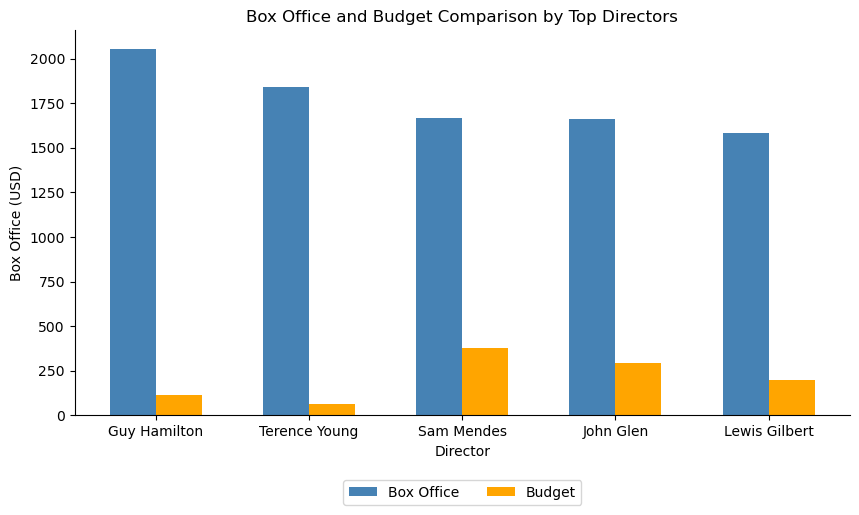

In [9]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Definimos los índices de las barras
index = np.arange(len(top_directors))
# Definimos el ancho de las barras
bar_width = 0.3

# Creamos un gráfico de barras para el 'Box Office'
plt.bar(index, top_directors['Box Office'], label='Box Office', color='steelblue', width=bar_width)
# Creamos un gráfico de barras para el 'Budget', desplazado a la derecha
plt.bar(index + bar_width, top_directors['Budget'], label='Budget', color='orange', width=bar_width)

# Añadimos el título y las etiquetas a los ejes
plt.title('Box Office and Budget Comparison by Top Directors')
plt.xlabel('Director')
plt.ylabel('Box Office (USD)')

# Añadimos las etiquetas para el eje x
plt.xticks(ticks=index + bar_width / 2, labels=top_directors['Director'])

# Colocamos la leyenda abajo
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Eliminamos el borde superior y derecho
sns.despine()

# Mostramos el gráfico
plt.show()

##### Gráfico de piruleta

Los gráficos de piruletas (o lollipop plot) es una variante de los gráficos de barras verticales. Utiliza una línea y un punto para marcar el valor de cada categoría.

La sintaxis para representar un gráfico de piruleta es la siguiente:

> ```python
> plt.stem(df['numerical_columns'], basefmt=' ') # Crear el gráfico de piruleta
> ```

> ```python
> plt.xticks(range(len(df)), 'categorical_column') # Añadir etiquetas de la variable categórica
> ```

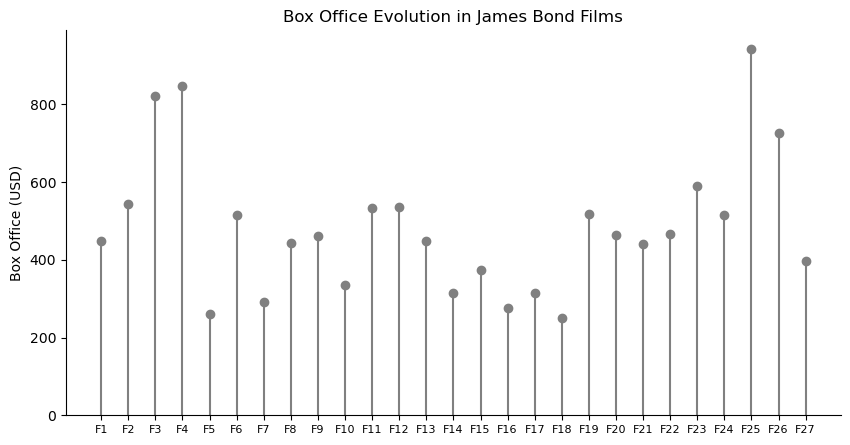

In [10]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos un gráfico de piruleta del 'Box Office' de todas las películas 
plt.stem(df_jamesbond['Box Office'], linefmt='grey', basefmt=' ')

# Añadimos el título y las etiquetas a los ejes
plt.title('Box Office Evolution in James Bond Films')
plt.xlabel('')
plt.ylabel('Box Office (USD)')

# Creamos etiquetas para el eje x
x_labels = [f'F{i+1}' for i in range(len(df_jamesbond))]
# Personalizamos las etiquetas del eje x
plt.xticks(ticks=range(len(df_jamesbond)), labels=x_labels, fontsize=8)

# Ajustamos el límite del eje y para que comience desde 0
plt.ylim(bottom=0)

# Eliminamos el borde superior y derecho
sns.despine()

# Mostramos el gráfico
plt.show()

#### Gráfico de barras horizontales

Los gráfico de barras horizontales son similares al gráfico vertical, pero las barras se encuentran alineadas horizontalmente.

👉 Este gráfico es muy útil cuando las etiquetas de las categorías son largas o numerosas, ya que cuentan con más espacio para su visualización sin necesidad de rotarlas.

La sintaxis de Seaborn para crear un gráfico de barras horizontales es esta:

> ```python
> sns.barplot(df, x='numeric_column', y='categorical_column')
> ```

##### Gráfico de barras horizontales básico

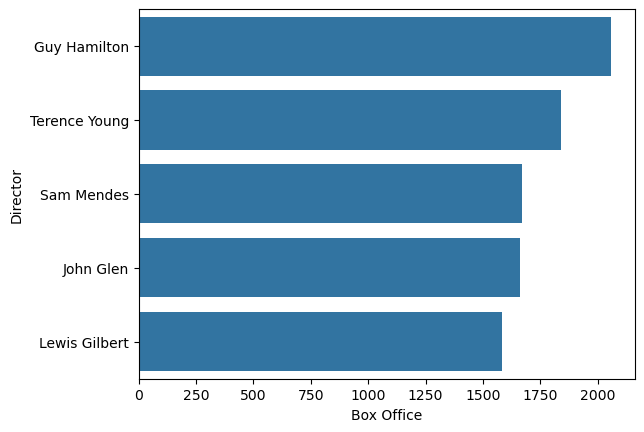

In [11]:
# Creamos un gráfico de barras horizontales de los tres directores con mayor 'Box Office'
sns.barplot(top_directors, x='Box Office', y='Director')
plt.show()

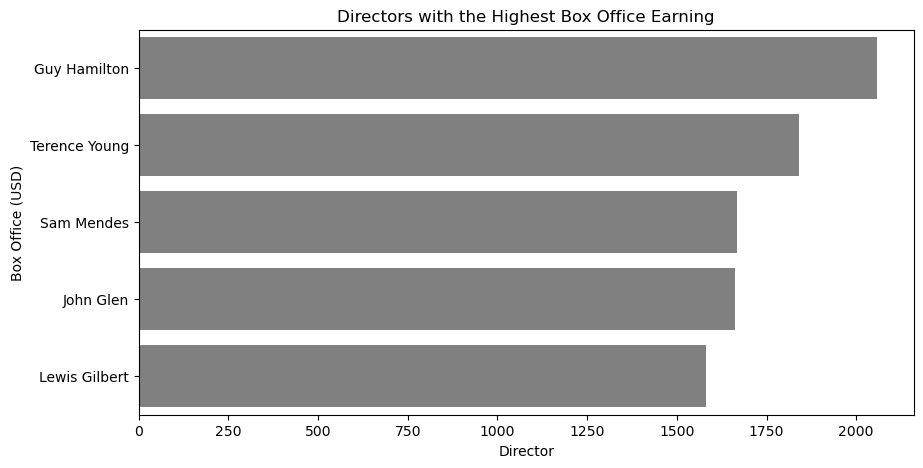

In [12]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos un gráfico de barras horizontales de los directores con mayor 'Box Office'
sns.barplot(top_directors, x='Box Office', y='Director', color='grey')

# Añadimos el título al gráfico y a las etiquetas a los ejes
plt.title('Directors with the Highest Box Office Earning')
plt.xlabel('Director')
plt.ylabel('Box Office (USD)')

# Mostramos el gráfico
plt.show()

##### Gráfico de barras horizontales avanzado

En el caso del gráfico de barras horizontales, se personaliza el formato del eje x utilizando `xaxis` en vez de `yaxis`.

> ```python
> plt.gca().xaxis.set_major_formatter(FuncFormatter(formatter))
> ```

Para añadir etiquetas en las barras, se puede realizar de esta manera:

> ```python
> for index, value in enumerate(df['numeric_column']):
>     plt.text(value, index, formatter, ha='left', va='bottom')
> ```

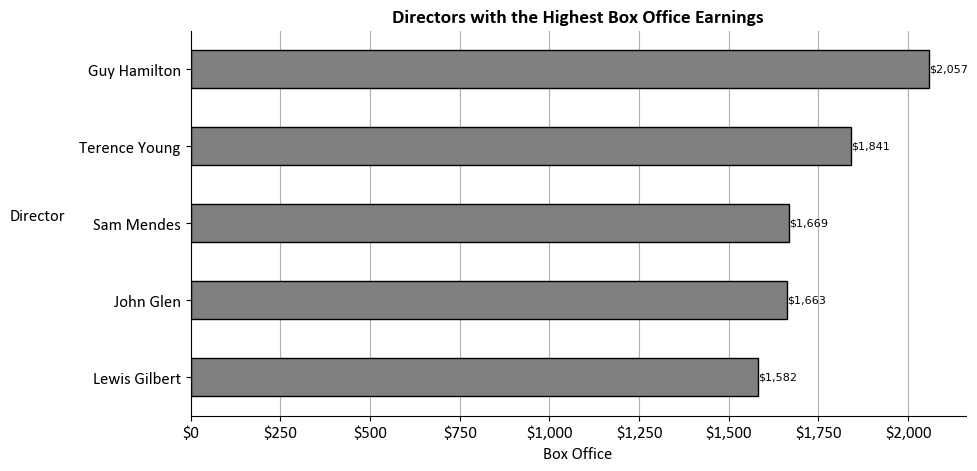

In [13]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos el gráfico de barras anterior, incluyendo bordes y ajustando el ancho de las barras
sns.barplot(data=top_directors, x='Box Office', y='Director', color='grey', edgecolor='black', width=0.5, zorder=2)

# Añadimos el título del gráfico
plt.title('Directors with the Highest Box Office Earnings', fontsize=14, fontweight='bold', family='Calibri')

# Configuramos las etiquetas de los ejes
plt.xlabel('Box Office', fontsize=12, family='Calibri')
plt.ylabel('Director', fontsize=12, family='Calibri', rotation=0, labelpad=30)

# Ajustamos la fuente de los valores del eje
plt.xticks(fontsize=12, family='Calibri')
plt.yticks(fontsize=12, family='Calibri')

# Añadimos los valores en cada barra
for index, value in enumerate(top_directors['Box Office']):
    plt.text(value, index, f'${value:,.0f}', ha='left', va='center', fontsize=8)

# Formateamos el eje x para añadir el símbolo del dolar a los valores
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Configuramos la cuadrícula del eje y
plt.grid(axis='x')

# Eliminamos el borde superior y derecho
sns.despine()

# Mostramos el gráfico
plt.show()

##### Gráfico de barras apiladas

Los gráficos de barras apiladas son ideales para mostrar la composición de un total dentro de cada categoría, permitiendo comparar tanto la magnitud total como la contribución de las subcategorías. En lugar de usar barras separadas, las diferentes subcategorías se apilan una encima de otra dentro de cada barra.

El código para crear un gráfico de barras apiladas horizontales es el siguiente:

> ```python
> # Crear barras para la primera variable numérica
> plt.barh(np.arange(len(df)), df['numeric_column_1'], label='numeric_column_1', width=bar_width) 
> ```

> ```python
> # Crear barras para la segunda variable numérica
> plt.barh(np.arange(len(df)) + bar_width, df['numeric_column_2'], label='numeric_column_2', width=bar_width) 
> ```

> ```python
> # Añadir etiquetas de la variable categórica
> plt.yticks(index + bar_width / 2, df['categorical_column']) 
> ```

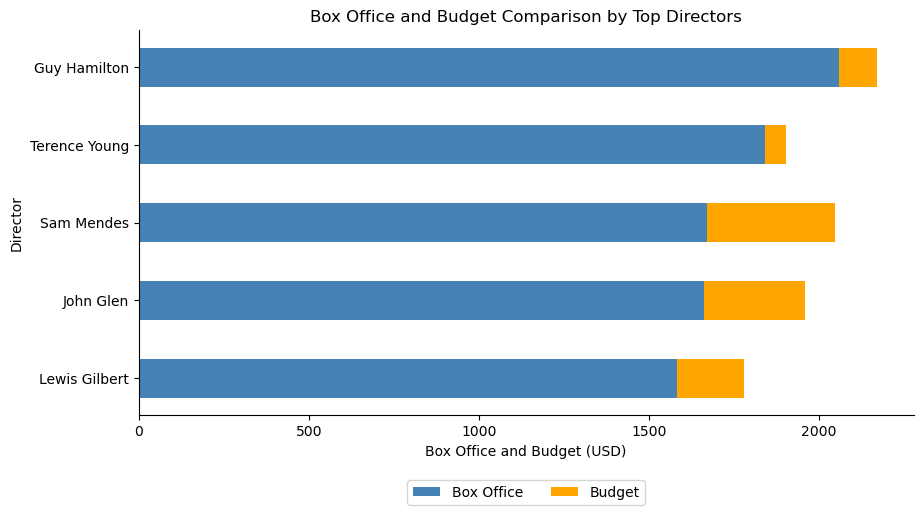

In [14]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Definimos los índices de las barras
index = np.arange(len(top_directors))
# Definimos el ancho de las barras
bar_width = 0.5

# Ordenamos por 'Box Office' de menor a mayor para que los directores aparezcan en orden descendente en el gráfico
top_directors = top_directors.sort_values(by='Box Office', ascending=True)

# Creamos un gráfico de barras horizontales apiladas para 'Box Office' y 'Budget'
plt.barh(index, top_directors['Box Office'], label='Box Office', color='steelblue', height=bar_width)
plt.barh(index, top_directors['Budget'], label='Budget', color='orange', height=bar_width, left=top_directors['Box Office'])

# Añadimos el título y las etiquetas a los ejes
plt.title('Box Office and Budget Comparison by Top Directors')
plt.xlabel('Box Office and Budget (USD)')
plt.ylabel('Director')

# Añadimos las etiquetas para el eje y
plt.yticks(index, top_directors['Director'])

# Colocamos la leyenda abajo
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Eliminamos el borde superior y derecho
sns.despine()

# Mostramos el gráfico
plt.show()

### 6.3 - Gráficos de series temporales
---

Los gráficos de series temporales se utilizan para visualizar grandes cantidades de datos que tienen lugar durante un período continuado de tiempo.

#### Gráfico de líneas

Los gráficos de líneas conectan puntos de datos consecutivos en una línea. Proporcionan una forma sencilla de visualizar una secuencia de valores, lo que muestra la evolución de una sola variable, facilitando la identificación tendencias a lo largo del tiempo.

##### Gráfico de líneas básico

Para crear un gráfico de líneas con Seaborn, se debe indicar la variable del eje x, que representa el tiempo, y la del eje y, que muestra los valores numéricos correspondientes:

> ```python
> sns.lineplot(df, x='date_column', y='numeric_column')
> ```

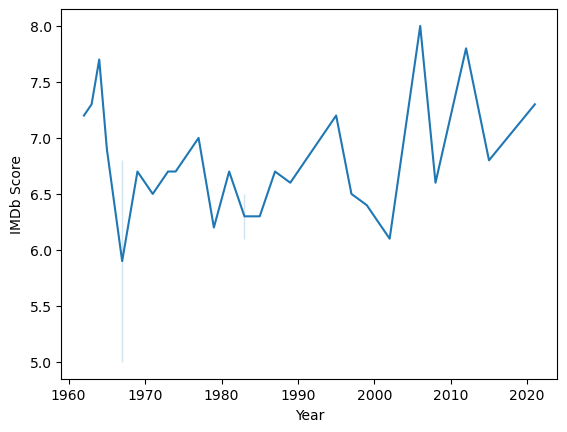

In [15]:
# Creamos un gráfico de líneas del 'IMDb Score' a lo largo de los años
sns.lineplot(df_jamesbond, x='Year', y='IMDb Score')
plt.show()

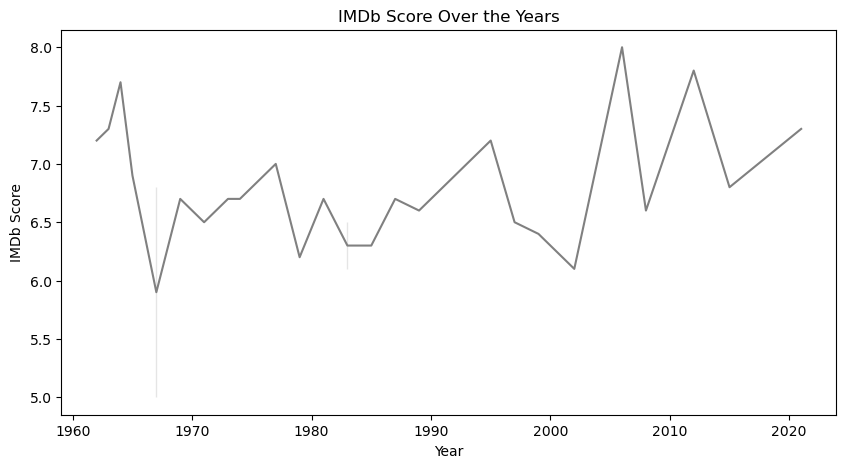

In [16]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos el gráfico de líneas anterior
sns.lineplot(df_jamesbond, x='Year', y='IMDb Score', color='grey')

# Añadimos el título al gráfico y las etiquetas a los ejes
plt.title('IMDb Score Over the Years')
plt.xlabel('Year')
plt.ylabel('IMDb Score')

# Mostramos el gráfico
plt.show()

##### Gráfico de líneas avanzado

👉 Es común que los gráficos de líneas no comiencen desde el valor mínimo o deseado en el eje y. Para corregir esto, se puede ajustar el límite inferior del eje y utilizando la función `plt.ylim(bottom, top)`.

Además, se pueden agregar etiquetas de texto con los valores de cada puntos al gráfico utilizando un bucle para recorrer los valores:

> ```python
> for date, value in zip(df['date_column'], df['numeric_column']):
>     plt.text(date, value, formatter, ha='center', va='bottom')
> ```

También se puede añadir una línea horizontal que marque un valor específico, como la media del conjunto de datos:

> ```python
> plt.axhline(df['numeric_column'].agg_function(), linestyle=type_line)
> ```

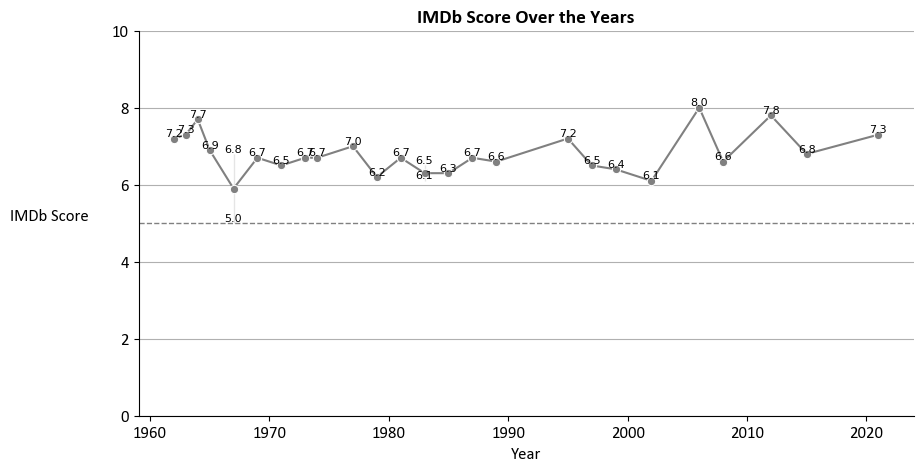

In [17]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos el gráfico de líneas anterior
sns.lineplot(df_jamesbond, x='Year', y='IMDb Score', marker='o', color='grey')

# Añadimos el título al gráfico
plt.title('IMDb Score Over the Years', fontsize=14, fontweight='bold', family='Calibri')

# Configuramos las etiquetas de los ejes
plt.xlabel('Year', fontsize=12, family='Calibri')
plt.ylabel('IMDb Score', fontsize=12, family='Calibri', rotation=0, labelpad=45)

# Ajustamos la fuente de los ejes
plt.xticks(fontsize=12, family='Calibri')
plt.yticks(fontsize=12, family='Calibri')

# Ajustamos el límite del eje y
plt.ylim(0, 10)

# Añadimos los valores de cada año
for date, value in zip(df_jamesbond['Year'], df_jamesbond['IMDb Score']):
    plt.text(date, value, f'{value:.1f}', ha='center', va='bottom', fontsize=8)

# Añadimos una línea discontinua con el valor mínimo
plt.axhline(df_jamesbond['IMDb Score'].min(), color='grey', linestyle='--', linewidth=1)

# Configuramos la cuadrícula del eje y
plt.grid(axis='y')

# Eliminamos el borde superior y derecho
sns.despine()

# Mostramos el gráfico
plt.show()

##### Gráfico de líneas múltiples

A la hora de representar series temporales, es muy interesante comparar varias series entre sí. Para ello, se pueden superponer múltiples gráficos de líneas en un solo gráfico de la siguiente forma:

> ```python
> sns.lineplot(df_1, x='date_column', y='numeric_column', label='Label 1')
> ```

> ```python
> sns.lineplot(df_2, x='date_column', y='numeric_column', label='Label 2')
> ```

In [18]:
# Importamos otro DataFrame
df_amzn = pd.read_csv('./data/amzn_stock.csv')
df_amzn.head()

Date      Open      High       Low     Close      Volume
0  1997-05-15  0.121875  0.125000  0.096354  0.097917  1443120000
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   294000000
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   122136000
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   109344000
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   377064000

In [19]:
# Convertimos la columna 'Date' a tipo fecha
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'])
df_amzn.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [20]:
# Creamos una columna con el año
df_amzn['Year'] = df_amzn['Date'].dt.year

# Creamos una columna con el número de semana
df_amzn['Week Number'] = df_amzn['Date'].dt.isocalendar().week

In [21]:
# Calculamos el 'Close' promedio por año y número de la semana
amzn_weekly = df_amzn.groupby(['Year', 'Week Number']).agg({'Close':'mean'}).round(2).reset_index()
amzn_weekly.head()

Year  Week Number  Close
0  1997            1   0.24
1  1997           20   0.09
2  1997           21   0.08
3  1997           22   0.08
4  1997           23   0.08

In [22]:
# Filtramos la agregación anterior para el año 2023
amzn_weekly_23 = amzn_weekly[amzn_weekly['Year'] == 2023]

# Filtramos la agregación anterior para el año 2024
amzn_weekly_24 = amzn_weekly[amzn_weekly['Year'] == 2024]

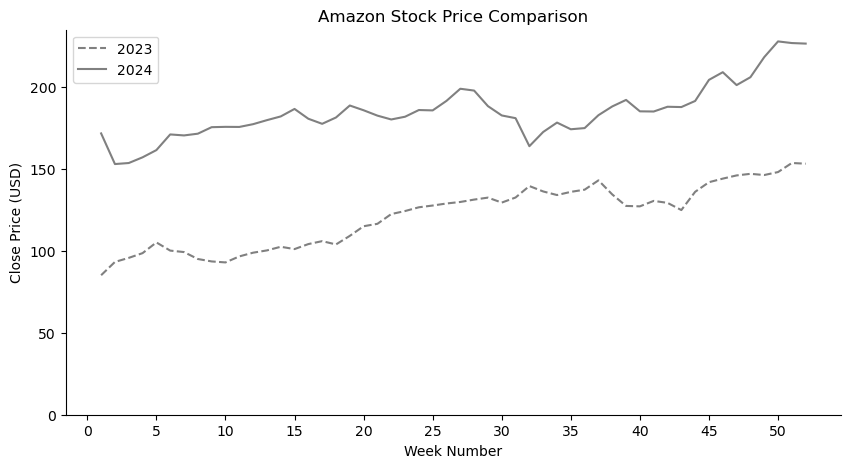

In [23]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos dos series temporales para los años 2023 y 2024
sns.lineplot(amzn_weekly_23, x='Week Number', y='Close', label='2023', color='grey', linestyle='--')
sns.lineplot(amzn_weekly_24, x='Week Number', y='Close', label='2024', color='grey')

# Añadir título y etiquetas a los ejes
plt.title('Amazon Stock Price Comparison')
plt.xlabel('Week Number')
plt.ylabel('Close Price (USD)')

# Configuramos las etiquetas del eje x para que se muestren en intervalos de 5
plt.xticks(list(range(0, amzn_weekly['Week Number'].max() + 1, 5)))

# Ajustamos el límite del eje y
plt.ylim(0)

# Eliminamos el borde superior y derecho
sns.despine()

# Mostramos el gráfico
plt.show()

👉 Incluir el texto de la leyenda al final de las líneas es una buena práctica de visualización, ya que permite al lector asociar rápidamente cada línea con su respectiva categoría, sin distracciones visuales.

La función `plt.text` también sirve para implementar esta funcionalidad:

> ```python
> # Obtener último punto de la primera serie
> last_point_1 = df_1.iloc[-1] 
> ```

> ```python
> # Obtener último punto de la segunda serie
> last_point_2 = df_2.iloc[-1] 
> ```

> ```python
> # Etiquetar la variable categórica de la primera línea al final
> plt.text(last_point_1['date_column'] + 0.5, last_point_1['numeric_column'], 'Label 1')
> ```

> ```python
> # Etiquetar la variable categórica de la segunda línea al final
> plt.text(last_point_2['date_column'] + 0.5, last_point_2['numeric_column'], 'Label 2')
> ```

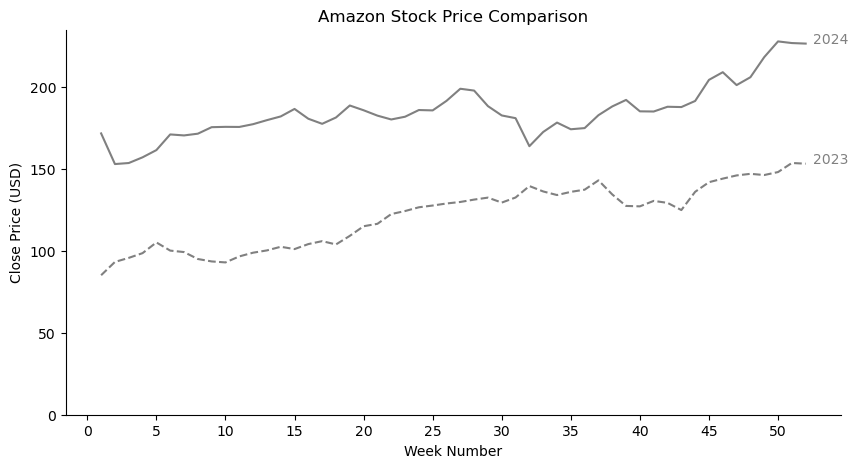

In [24]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Repetimos el gráfico de líneas para los años 2023 y 2024
sns.lineplot(amzn_weekly_23, x='Week Number', y='Close', color='grey', linestyle='--')
sns.lineplot(amzn_weekly_24, x='Week Number', y='Close', color='grey')

# Añadir el título y las etiquetas a los ejes
plt.title('Amazon Stock Price Comparison')
plt.xlabel('Week Number')
plt.ylabel('Close Price (USD)')

# Configuramos las etiquetas del eje x para que se muestren en intervalos de 5
plt.xticks(list(range(0, amzn_weekly['Week Number'].max() + 1, 5)))

# Ajustamos el límite del eje y
plt.ylim(0)

# Obtenemos el último punto del año 2023 y del año 2024
last_point_2023 = amzn_weekly_23.iloc[-1]
last_point_2024 = amzn_weekly_24.iloc[-1]

# Incluimos la leyenda al final de cada línea
plt.text(last_point_2023['Week Number'] + 0.5, last_point_2023['Close'], '2023', color='grey')
plt.text(last_point_2024['Week Number'] + 0.5, last_point_2024['Close'], '2024', color='grey')

# Eliminamos el borde superior y derecho
sns.despine()

# Mostramos el gráfico
plt.show()

#### Gráfico de área

El gráfico de área es un gráfico de líneas en el que todo el área entre la línea y el eje se rellena con un color, enfatizando el volumen o la magnitud total de los datos.

##### Gráfico de área básico

La sintaxis básica para representar un gráfico de área con Matplotlib es esta:

> ```python
> plt.fill_between(df['date_column'], df['numeric_column'])
> ```

In [25]:
# Calculamos la media anual del 'IMDb Score'
yearly_score = df_jamesbond.groupby('Year').agg({'IMDb Score':'mean'}).reset_index()

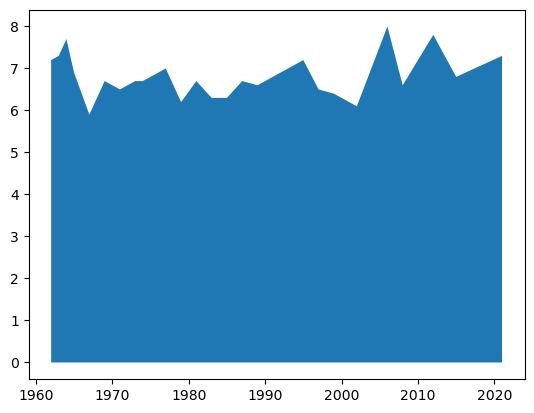

In [26]:
# Creamos un gráfico de área del 'IMDb Score' a lo largo de los años
plt.fill_between(yearly_score['Year'], yearly_score['IMDb Score'])
plt.show()

##### Gráfico de área avanzado

En un gráfico de área, algunos de los parámetros clave son los siguientes:

- `color` define el color de relleno.

- `alpha` ajusta la transparencia del relleno (0 es completamente transparente, 1 es opaco).

- `linewidth` especifica el grosor de la línea que delimita el contorno del área.

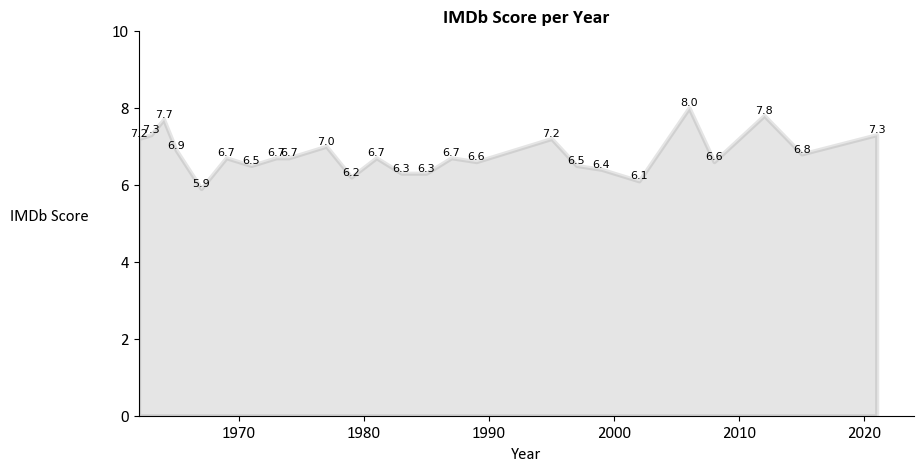

In [27]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos el gráfico de área anterior, incluyendo el color y el grosor del borde del área
plt.fill_between(yearly_score['Year'], yearly_score['IMDb Score'], color='grey', alpha=0.2, linewidth=3)

# Añadimos el título al gráfico
plt.title('IMDb Score per Year', fontsize=14, fontweight='bold', family='Calibri')

# Configuramos las etiquetas de los ejes
plt.xlabel('Year', fontsize=12, family='Calibri')
plt.ylabel('IMDb Score', fontsize=12, family='Calibri', rotation=0, labelpad=45)

# Ajustamos la fuente de los ejes
plt.xticks(fontsize=12, family='Calibri')
plt.yticks(fontsize=12, family='Calibri')

# Ajustamos los límites de los ejes
plt.xlim(yearly_score['Year'].min())
plt.ylim(0, 10)

# Añadimos los valores de cada año
for x, y in zip(yearly_score['Year'], yearly_score['IMDb Score']):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8)

# Eliminamos el borde superior y derecho
sns.despine()

# Mostramos el gráfico
plt.show()

### 6.4 - Gráficos bidimensionales
---

Los gráficos bidimensionales son tipos de visualización para explorar la relación entre dos variables continuas o para representar distribuciones complejas en un espacio bidimensional. Las principales representaciones son el gráfico de dispersión y el diagrama de contorno.

#### Gráfico de dispersión

Los gráficos de dispersión representan puntos en un plano cartesiano, donde cada punto corresponde a un par de valores de dos variables numéricas. Se utilizan para analizar correlaciones y detectar tendencias o valores atípicos.

##### Gráfico de dispersión básico

Con Seaborn, el gráfico de dispersión se visualiza a través de la función `sns.scatterplot()`:

> ```python
> sns.scatterplot(df, x='numeric_column_1', y='numeric_column_2')
> ```

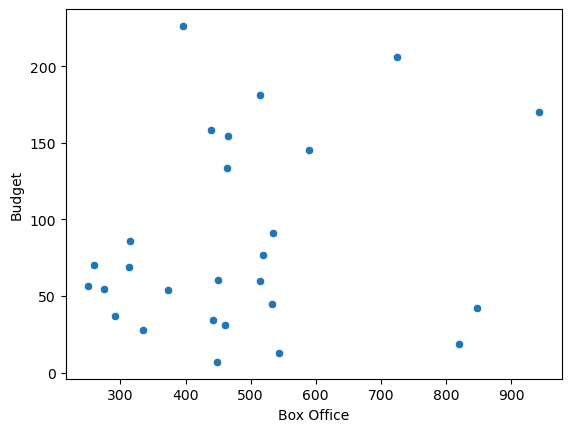

In [28]:
# Creamos un gráfico de dispersión con la relación entre el 'Box Office' y el 'Budget'
sns.scatterplot(df_jamesbond, x='Box Office', y='Budget')
plt.show()

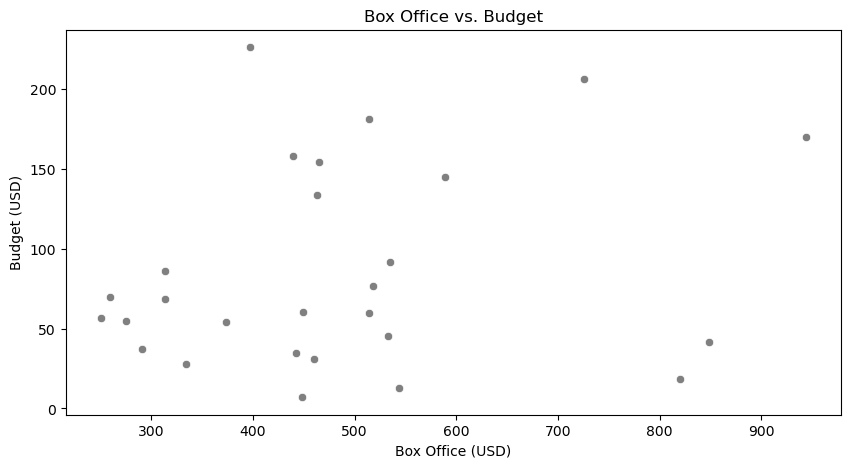

In [29]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos el gráfico de dispersión anterior
sns.scatterplot(df_jamesbond, x='Box Office', y='Budget', color='grey')

# Añadimos el título al gráfico y las etiquetas a los ejes
plt.title('Box Office vs. Budget')
plt.xlabel('Box Office (USD)')
plt.ylabel('Budget (USD)')

# Mostramos el gráfico
plt.show()

##### Gráfico de dispersión avanzado

Para incluir etiquetas con valores de una variable, normalmente categórica, en el gráfico de dispersión, se puede utilizar el siguiente código:

> ```python
> for i in range(len(df)):
>     plt.text(df['numeric_column_1'].iloc[i], df['numeric_column_2'].iloc[i], df['label_column'].iloc[i], ha='left', va='bottom')
> ```

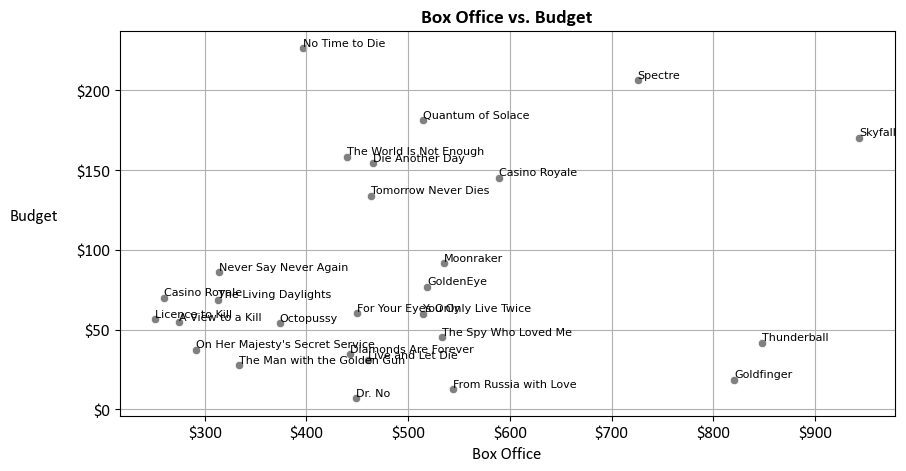

In [30]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Volvemos a crear el gráfico de dispersión que representa la relación entre el 'Box Office' y el 'Budget'
sns.scatterplot(df_jamesbond, x='Box Office', y='Budget', color='grey')

# Añadimos el título del gráfico
plt.title('Box Office vs. Budget', fontsize=14, fontweight='bold', family='Calibri')

# Configuramos las etiquetas de los ejes
plt.xlabel('Box Office', fontsize=12, family='Calibri')
plt.ylabel('Budget', fontsize=12, family='Calibri', rotation=0, labelpad=30)

# Ajustamos la fuente de los ejes
plt.xticks(fontsize=12, family='Calibri')
plt.yticks(fontsize=12, family='Calibri')

# Añadimos el título de la película en cada punto
for i in range(len(df_jamesbond)):
    plt.text(df_jamesbond['Box Office'].iloc[i], df_jamesbond['Budget'].iloc[i], df_jamesbond['Film'].iloc[i], ha='left', va='bottom', fontsize=8)
    
# Formateamos los ejes para añadir el símbolo del dolar a los valores
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Configuramos la cuadrícula de los ejes
plt.grid()

# Mostramos el gráfico
plt.show()

Los parámetros `hue` y `style` de `sns.scatterplot()` permiten diferenciar visualmente los puntos en un gráfico de dispersión según una variable categórica. `hue` se utiliza para asignar colores diferentes a los puntos en función de la categoría, mientras que `style` modifica la forma de los puntos según la misma u otra variable categórica.

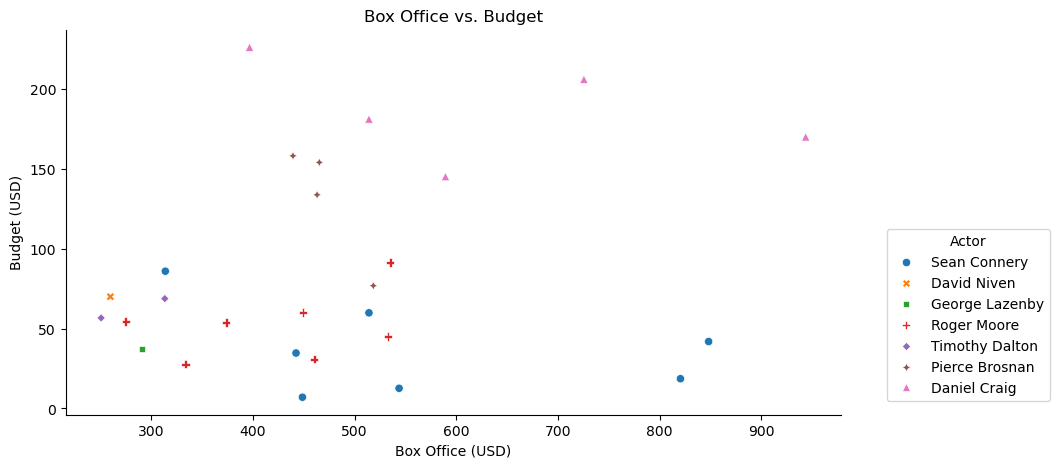

In [31]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos el gráfico de dispersión, diferenciando los puntos según el valor de 'Actor'
sns.scatterplot(df_jamesbond, x='Box Office', y='Budget', hue='Actor', style='Actor')

# Añadimos el título al gráfico y las etiquetas a los ejes
plt.title('Box Office vs. Budget')
plt.xlabel('Box Office (USD)')
plt.ylabel('Budget (USD)')

# Colocamos la leyenda abajo a la derecha
plt.legend(title='Actor', loc='upper left', bbox_to_anchor=(1.05, 0.5))

# Eliminamos el borde superior y derecho
sns.despine()

# Mostramos el gráfico
plt.show()

##### Gráfico de burbujas

Los gráficos de burbujas son una variación del gráfico de dispersión que se utiliza para representar tres variables en dos dimensiones. En este tipo de gráfico, cada punto o burbuja tiene una posición en el eje x y el eje y, como en un gráfico de dispersión estándar. Sin embargo, el tamaño de cada burbuja está determinado por una tercera variable numérica, lo que permite visualizar una dimensión adicional.

Para crear un gráfico de burbujas, se utiliza `sns.scatterplot()`, con un parámetro adicional (`size`) que permite especificar la variable que define el tamaño de las burbujas. Además, el parámetro `sizes` permite ajustar los tamaños mínimo y máximo de las burbujas.

> ```python
> sns.scatterplot(df, x='numeric_column_1', y='numeric_column_2', size='numeric_column_3', sizes=(min_size, max_size))
> ```

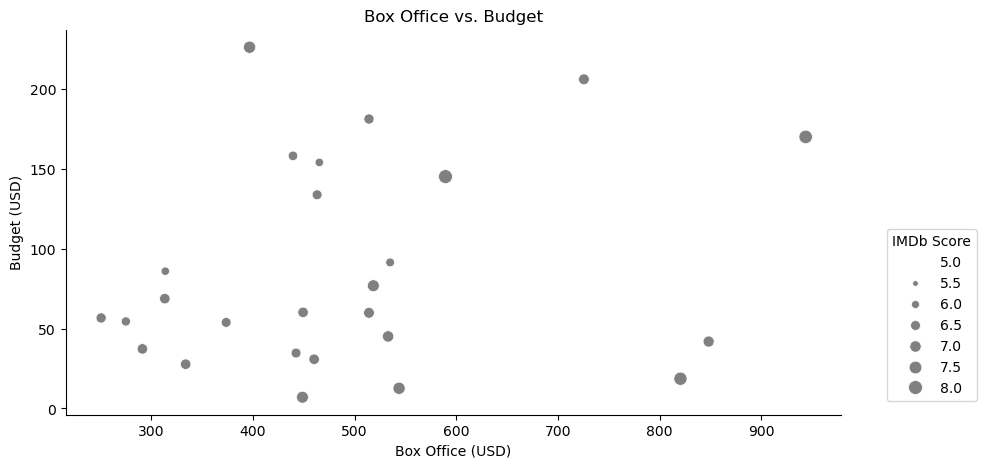

In [32]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos un gráfico de dispersión, variando el tamaños de los puntos en función de 'IMDb Score'
sns.scatterplot(df_jamesbond, x='Box Office', y='Budget', size='IMDb Score', sizes=(0, 100), color='grey')

# Añadimos el título al gráfico y las etiquetas a los ejes
plt.title('Box Office vs. Budget')
plt.xlabel('Box Office (USD)')
plt.ylabel('Budget (USD)')

# Colocamos la leyenda del tamaño de las burbujas abajo a la derecha
plt.legend(title='IMDb Score', bbox_to_anchor=(1.05, 0.5), loc='upper left')

# Eliminamos el borde superior y derecho
sns.despine()

# Mostramos el gráfico
plt.show()

#### Diagrama de contorno

Los diagramas de contorno muestran líneas o áreas que representan diferentes niveles de densidad o probabilidad en un plano bidimensional para entender la distribución conjunta de dos variables numéricas.

##### Diagrama de contorno básico

La función `sns.kdeplot` permite crear un diagrama de contorno:

> ```python
> sns.kdeplot(df, x='numeric_column_1', y='numeric_column_2', fill=True/False, bw_adjust=band_width, cmap=color_map)
> ```

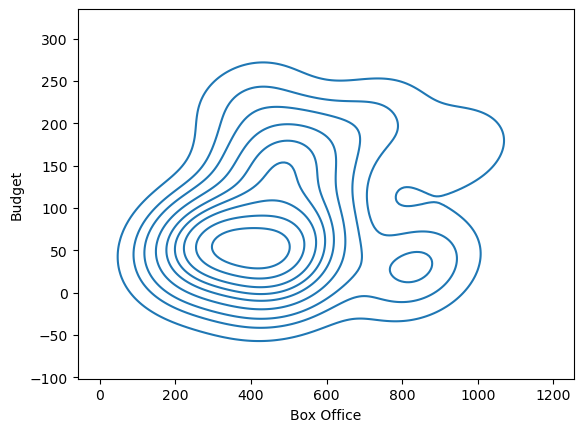

In [33]:
# Creamos un diagrama de contorno entre el 'Box Office' y el 'Budget'
sns.kdeplot(df_jamesbond, x='Box Office', y='Budget')
plt.show()

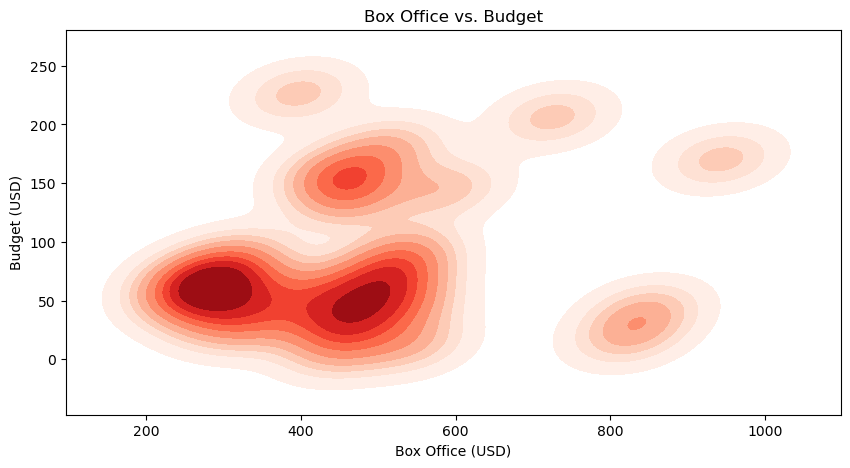

In [34]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Creamos un diagrama de contorno con relleno que muestra la distribución de densidad entre 'Box Office' y 'Budget'
sns.kdeplot(df_jamesbond, x='Box Office', y='Budget', fill=True, bw_adjust=0.5, cmap='Reds')

# Añadimos el título al gráfico y las etiquetas a los ejes
plt.title('Box Office vs. Budget')
plt.xlabel('Box Office (USD)')
plt.ylabel('Budget (USD)')

# Mostramos el gráfico
plt.show()

##### Diagrama de contorno avanzado

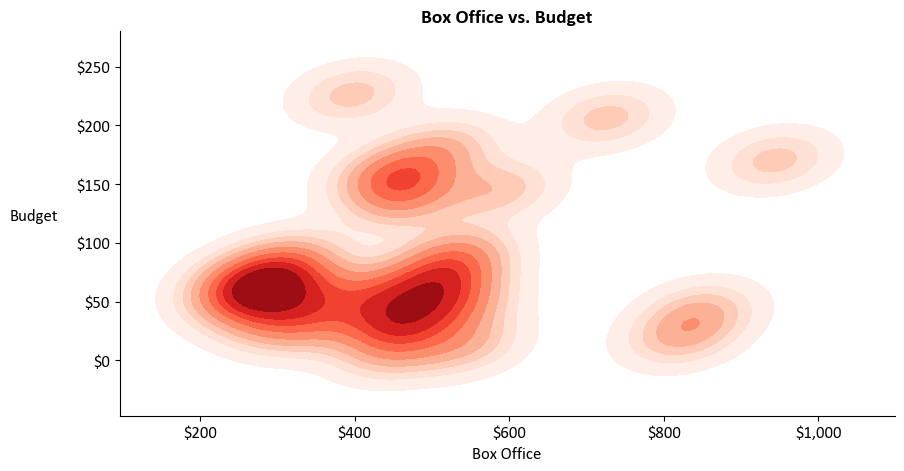

In [35]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Representamos el diagrama de contorno anterior
sns.kdeplot(df_jamesbond, x='Box Office', y='Budget', fill=True, bw_adjust=0.5, cmap='Reds')

# Añadimos el título al gráfico
plt.title('Box Office vs. Budget', fontsize=14, fontweight='bold', family='Calibri')

# Configuramos las etiquetas de los ejes
plt.xlabel('Box Office', fontsize=12, family='Calibri')
plt.ylabel('Budget', fontsize=12, family='Calibri', rotation=0, labelpad=30)

# Ajustamos la fuente de los ejes
plt.xticks(fontsize=12, family='Calibri')
plt.yticks(fontsize=12, family='Calibri')

# Formateamos los ejes para añadir el símbolo del dolar a los valores
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Eliminamos el borde superior y derecho
sns.despine()

# Mostramos el gráfico
plt.show()

### 6.5 - Gráficos circulares
---

Los gráficos circulares son visualizaciones en forma de círculo que se utilizan para mostrar la distribución o proporción de diferentes categorías dentro de un conjunto de datos. Son útiles cuando se quiere representar y comparar una pequeña cantidad de categorías.

#### Gráfico de tarta

El gráfico de tarta (o pie chart) divide en segmentos que representan las diferentes categorías de un conjunto de datos. Cada porción del gráfico tiene un tamaño proporcional a la cantidad o frecuencia de la categoría que representa.

##### Gráfico de tarta básico

Se puede crear un gráfico de tarta en Matplotlib utilizando la función `plt.pie()`. A continuación, se especifica cómo visualizar este gráfico:

> ```python
> plt.pie(df['numerical_column'], labels=df['categorical_column'])
> ```

In [36]:
# Creamos una nueva columna 'Century' que clasifique las películas como '20th' o '21st' según el año
df_jamesbond['Century'] = df_jamesbond['Year'].apply(lambda x: '20th' if x < 2001 else '21st')

In [37]:
# Contamos las películas estrenadas en cada siglo
century_counts = df_jamesbond['Century'].value_counts()
century_counts

Century
20th    21
21st     6
Name: count, dtype: int64

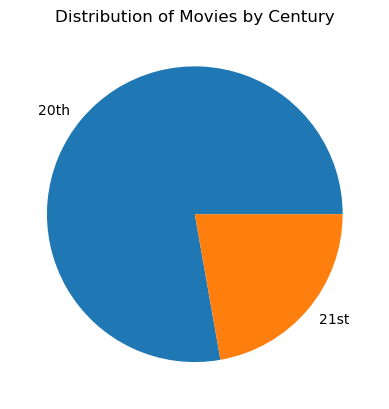

In [38]:
# Creamos un gráfico de tarta con la proporción de películas según su siglo
plt.pie(century_counts, labels=century_counts.index)

# Añadimos el título al gráfico
plt.title('Distribution of Movies by Century')

# Mostramos el gráfico
plt.show()

##### Gráfico de tarta avanzado

El gráfico de tarta de Matplotlib incluye parámetros adicionales para mejorar su presentación. Tres parámetros muy útiles para estos ajustes son:

- `autopct` se utiliza para mostrar los porcentajes dentro de cada sección del gráfico
  
- `startangle` ajusta el ángulo de inicio del gráfico

- `wedgeprops` permite personalizar las propiedades de las secciones, como el color del borde o su grosor.

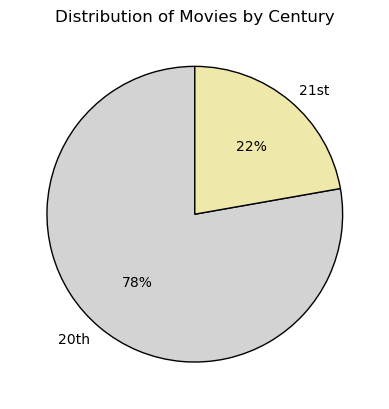

In [39]:
# Añadimos al gráfico de tarta el porcentaje de cada sección, además de ajustar el ángulo en el que comienza el gráfico y de personalizar los colores
plt.pie(century_counts, labels=century_counts.index, autopct='%1.0f%%', startangle=90, 
        colors=['lightgray', 'palegoldenrod'], wedgeprops={'edgecolor':'black'})

# Añadimos el título al gráfico
plt.title('Distribution of Movies by Century')

# Mostramos el gráfico
plt.show()

#### Gráfico de donut

El gráfico de donut es una variación del gráfico de tarta en la que el círculo central está vacío, formando un anillo en lugar de un círculo completo. Al igual que el gráfico de tarta, las secciones representan porcentajes de un total, pero su estructura ofrece más flexibilidad visual.

##### Gráfico de donut básico

Para crear un gráfico de donut, hay que visualizar el gráfico de tarta con `plt.pie()` y después agregar un círculo blanco en el centro utilizando `plt.Circle()`, con un radio específico.

> ```python
> plt.pie(df['numerical_column'], labels=df['categorical_column'])
> ```

> ```python
> plt.gca().add_artist(plt.Circle((0,0), radius_size, color='white'))
> ```

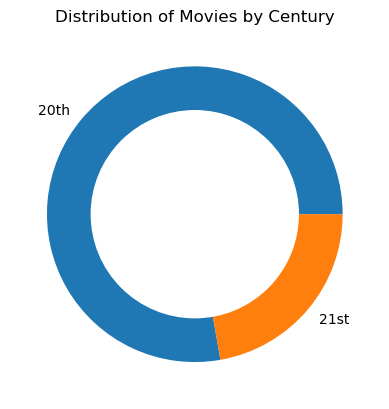

In [40]:
# Creamos un gráfico circular con la proporción de películas según su siglo
plt.pie(century_counts, labels=century_counts.index)

# Hacemos un agujero en el centro para generar un gráfico de donut
plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))

# Añadimos el título al gráfico
plt.title('Distribution of Movies by Century')

# Mostramos el gráfico
plt.show()

##### Gráfico de donut avanzado

Como en el gráfico de tarta, los gráficos de donut cuentan con los parámetros `autopct`, `startangle` y `wedgeprops`. Un parámetro muy útil en el gráfico de donut es `pctdistance`, para centrar los porcentajes dentro del anillo.

Adicionalmente, es posible incluir un texto en el centro del gráfico para incluir un KPI o cualquier otra información adicional. Esto se puede añadir con la siguiente función:

> ```python
> plt.text(0, 0, f'{kpi}', ha='center', va='center')
> ```

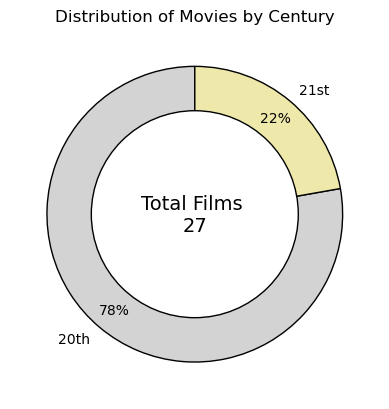

In [41]:
# Creamos un gráfico de donut con el porcentaje dentro de la sección del anillo
plt.pie(century_counts, labels=century_counts.index, autopct='%1.0f%%', pctdistance=0.85, startangle=90, 
        colors=['lightgray', 'palegoldenrod'], wedgeprops={'edgecolor':'black'})

# Añadimos un agujero en el centro especificando el color interior y el borde negro
plt.gca().add_artist(plt.Circle((0, 0), 0.70, facecolor='white', edgecolor='black'))

# Añadimos el total de películas dentro del agujero
plt.text(0, 0, f'Total Films \n{df_jamesbond['Film'].count()}', ha='center', va='center', fontsize=14)

# Añadimos el título al gráfico
plt.title('Distribution of Movies by Century')

# Mostramos el gráfico
plt.show()

##### Gráficos de donut anidados

Los gráficos de donut anidados permiten visualizar diferentes niveles de una misma categoría en un solo gráfico, mostrando las proporciones relativas de subcategorías dentro de categorías principales.

Para crear un gráfico de donut anidado, se utilizan dos o más llamadas a `ax.pie()`:

> ```python
> ax.pie(df['category_values'], labels=df['category'], radius=1, wedgeprops={'width':radius_size})
> ```

> ```python
> ax.pie(df['subcategory_values'], labels=df['subcategory'], radius=1-radius_size, wedgeprops={'width':radius_size})
> ```

In [42]:
# Creamos ahora la columna 'Decade' para clasificar las películas por década
df_jamesbond['Decade'] = (df_jamesbond['Year'] // 10) * 10

In [43]:
# Contamos las películas estrenadas en cada década
decade_counts = df_jamesbond['Decade'].value_counts().sort_index()
decade_counts

Decade
1960    7
1970    5
1980    6
1990    3
2000    3
2010    2
2020    1
Name: count, dtype: int64

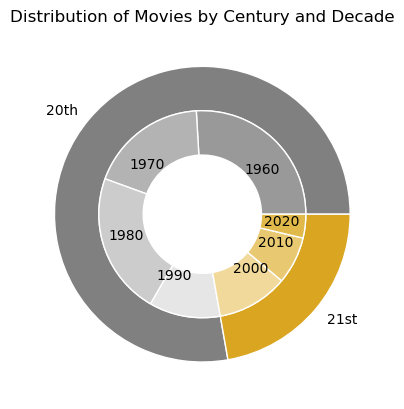

In [44]:
# Creamos una figura y sus ejes
fig, ax = plt.subplots()

# Definimos el tamaño del agujero central
size = 0.3

# Creamos el gráfico exterior para la distribución por siglo
ax.pie(century_counts, labels=century_counts.index, radius=1, colors=['gray','goldenrod'], wedgeprops={'edgecolor':'white', 'width':size})

# Creamos el gráfico interior para la distribución por década, ajustando el tamaño del agujero para que no se solapen
ax.pie(decade_counts, labels=decade_counts.index, labeldistance=0.6, radius=1-size, 
       colors=['#999999', '#B3B3B3', '#CCCCCC', '#E6E6E6', '#F0D99A', '#E8C972', '#E0B94A'], 
       wedgeprops={'edgecolor':'white', 'width':size})

# Añadimos el título al gráfico
ax.set(title='Distribution of Movies by Century and Decade')

# Mostramos el gráfico
plt.show()

### 6.6 - Gráfico de Waffle
---

El gráfico de Waffle utiliza una cuadrícula de cuadrados para representar partes o proporciones de un todo en un formato visual. Cada cuadrado en el gráfico puede representa una cantidad fija, como un porcentaje de un total.

#### Gráfico de Waffle básico

Para crear un gráfico de Waffle en Python, primero hay que instalar e importar la librería Pywaffle. Posteriormente, se emplea la siguiente sintaxis, donde se define el número de filas y los valores a representar:

> ```python
> plt.figure(FigureClass=Waffle, values=df['categorical_column'].value_counts(), rows=num_rows)
> ```

In [45]:
# Importamos el módulo 'Waffle' de la librería Pywaffle
from pywaffle import Waffle

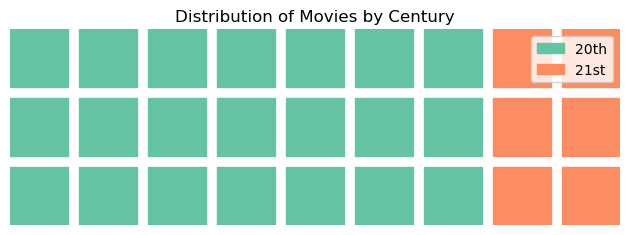

In [46]:
# Creamos un gráfico de Waffle con la proporción de películas según su siglo
plt.figure(FigureClass=Waffle, values=century_counts.to_dict(), rows=3)

# Añadimos el título al gráfico
plt.title('Distribution of Movies by Century')

# Mostramos el gráfico
plt.show()

#### Gráfico de Waffle avanzado

Al personalizar un gráfico de Waffle, se pueden utilizar parámetros como `icons`, que permite definir los íconos que representan cada celda, e `icon_legend`, que muestra una leyenda en el gráfico que asocia cada ícono con su categoría correspondiente.

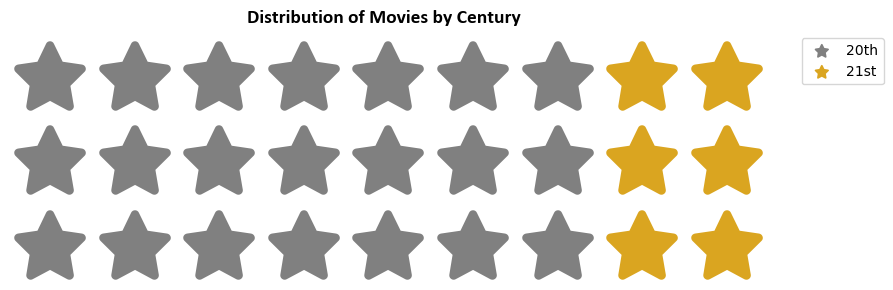

In [47]:
# Creamos el gráfico de Waffle con opciones personalizadas
plt.figure(FigureClass=Waffle, values=century_counts.to_dict(), rows=3, 
           colors=['gray','goldenrod'], icons='star', icon_legend=True, 
           legend={'loc':'upper left', 'bbox_to_anchor':(1.05, 1)}, figsize=(10, 3))

# Añadimos el título al gráfico
plt.title('Distribution of Movies by Century', fontsize=14, fontweight='bold', family='Calibri')

# Mostramos el gráfico
plt.show()

### 6.7 - Mapa de calor
---

Los mapas de calor son visualizaciones bidimensionales que comparan diferentes valores numéricos asociados a categorías, utilizando colores para representar las variaciones en los datos de una matriz o tabla. Este tipo de gráfico puede ser utilizado para visualizar matrices de correlación, concentraciones de datos en ciertas áreas o cualquier tipo de relación entre las variables numéricas.

#### Mapa de calor básico

La sintaxis para visualizar un mapa de calor con Seaborn es la siguiente:

> ```python
> sns.heatmap(df[['numeric_column_1', 'numeric_column_2', ...]])
> ```

In [48]:
# Seleccionamos las variables numéricas del DataFrame
film_values = df_jamesbond[['Film', 'Actor', 'Box Office', 'Budget', 'Bond Actor Salary', 'IMDb Score']].set_index('Film')

In [49]:
# Normalizamos 'Box Office', 'Budget' y 'Bond Actor Salary' dividiendo cada valor entre el valor máximo, de manera que todos los valores se escalen de 0 a 1
film_values['Box Office Normalized'] = film_values['Box Office'] / film_values['Box Office'].max()
film_values['Budget Normalized'] = film_values['Budget'] / film_values['Budget'].max()
film_values['Bond Actor Salary Normalized'] = film_values['Bond Actor Salary'] / film_values['Bond Actor Salary'].max()

film_values

Actor  Box Office  Budget  \
Film                                                                  
Dr. No                             Sean Connery       448.8     7.0   
From Russia with Love              Sean Connery       543.8    12.6   
Goldfinger                         Sean Connery       820.4    18.6   
Thunderball                        Sean Connery       848.1    41.9   
Casino Royale                       David Niven       260.0    70.0   
You Only Live Twice                Sean Connery       514.2    59.9   
On Her Majesty's Secret Service  George Lazenby       291.5    37.3   
Diamonds Are Forever               Sean Connery       442.5    34.7   
Live and Let Die                    Roger Moore       460.3    30.8   
The Man with the Golden Gun         Roger Moore       334.0    27.7   
The Spy Who Loved Me                Roger Moore       533.0    45.1   
Moonraker                           Roger Moore       535.0    91.5   
For Your Eyes Only                  Roger Moore       449.4    60.2   
Never Say Never Again              Sean Connery       314.0    86.0   
Octopussy                           Roger Moore       373.8    53.9   
A View to a Kill                    Roger Moore       275.2    54.5   
The Living Daylights             Timothy Dalton       313.5    68.8   
Licence to Kill                  Timothy Dalton       250.9    56.7   
GoldenEye                        Pierce Brosnan       518.5    76.9   
Tomorrow Never Dies              Pierce Brosnan       463.2   133.9   
The World Is Not Enough          Pierce Brosnan       439.5   158.3   
Die Another Day                  Pierce Brosnan       465.4   154.2   
Casino Royale                      Daniel Craig       589.4   145.3   
Quantum of Solace                  Daniel Craig       514.2   181.4   
Skyfall                            Daniel Craig       943.5   170.2   
Spectre                            Daniel Craig       725.5   206.3   
No Time to Die                     Daniel Craig       396.8   226.4   

                                 Bond Actor Salary  IMDb Score  \
Film                                                             
Dr. No                                         0.6         7.2   
From Russia with Love                          1.6         7.3   
Goldfinger                                     3.2         7.7   
Thunderball                                    4.7         6.9   
Casino Royale                                  NaN         5.0   
You Only Live Twice                            4.4         6.8   
On Her Majesty's Secret Service                0.6         6.7   
Diamonds Are Forever                           5.8         6.5   
Live and Let Die                               NaN         6.7   
The Man with the Golden Gun                    NaN         6.7   
The Spy Who Loved Me                           NaN         7.0   
Moonraker                                      NaN         6.2   
For Your Eyes Only                             NaN         6.7   
Never Say Never Again                          NaN         6.1   
Octopussy                                      7.8         6.5   
A View to a Kill                               9.1         6.3   
The Living Daylights                           5.2         6.7   
Licence to Kill                                7.9         6.6   
GoldenEye                                      5.1         7.2   
Tomorrow Never Dies                           10.0         6.5   
The World Is Not Enough                       13.5         6.4   
Die Another Day                               17.9         6.1   
Casino Royale                                  3.3         8.0   
Quantum of Solace                              8.1         6.6   
Skyfall                                       14.5         7.8   
Spectre                                        NaN         6.8   
No Time to Die                                 NaN         7.3   

                                 Box Office Normalized  Budget Norm

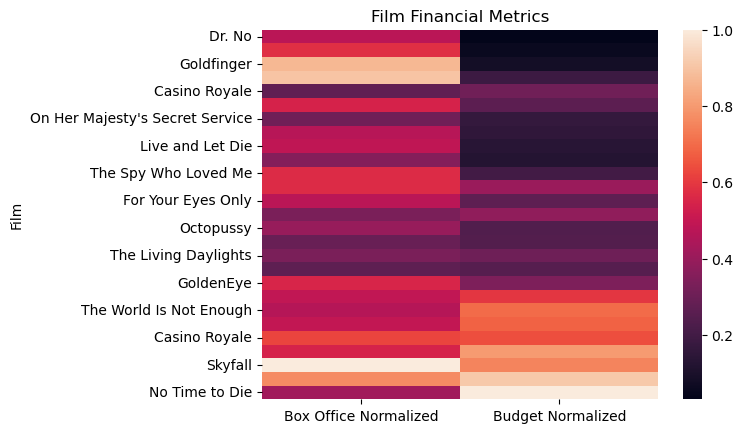

In [50]:
# Creamos un mapa de calor de las métricas financieras normalizadas
sns.heatmap(film_values[['Box Office Normalized', 'Budget Normalized']])

# Añadimos el título al gráfico
plt.title('Film Financial Metrics')

# Mostramos el gráfico
plt.show()

#### Mapa de calor avanzado

A continuación, se explican algunos de los parámetros más útiles en los mapas de calor de Seaborn:

- `xticklabels`: Permite mostrar las etiquetas del eje x.

- `yticklabels`: Permite mostrar las etiquetas del eje y.

- `square`: Si se establece en `True`, ajusta el mapa de calor para que cada celda sea cuadrada.

- `cbar`: Indica si se debe mostrar una barra de color, que actúa como leyenda.

- `annot`: Si se establece en `True`, los valores numéricos de las celdas son mostrados directamente sobre cada celda.

- `fmt`: Define el formato de los valores que se muestran al usar `annot`.

- `cmap`: Especifica la paleta de colores que representa los valores en el mapa de calor.

- `linecolor`: Permite especificar el color de las líneas que dividen las celdas del mapa de calor.

- `linewidths`: Define el grosor de las líneas divisorias entre las celdas del mapa de calor.

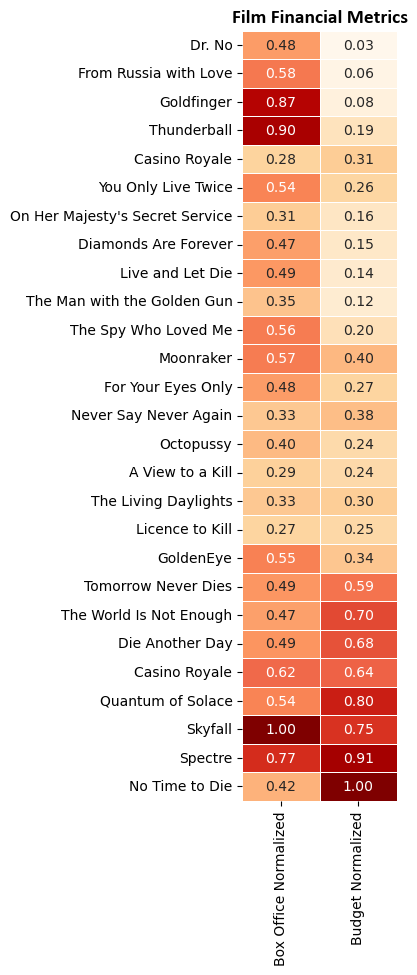

In [51]:
# Ajustamos el tamaño del gráfico
plt.figure(figsize=(2, 10))

# Personalizamos el color del mapa de calor e incluimos los valores numéricos dentro de las celdas
sns.heatmap(film_values[['Box Office Normalized', 'Budget Normalized']], xticklabels=True, cbar=False, annot=True, fmt='.2f', cmap='OrRd', linecolor='white', linewidths=0.5)

# Añadimos el título al gráfico
plt.title('Film Financial Metrics', fontsize=14, fontweight='bold', family='Calibri')
plt.ylabel('')

# Mostramos el gráfico
plt.show()

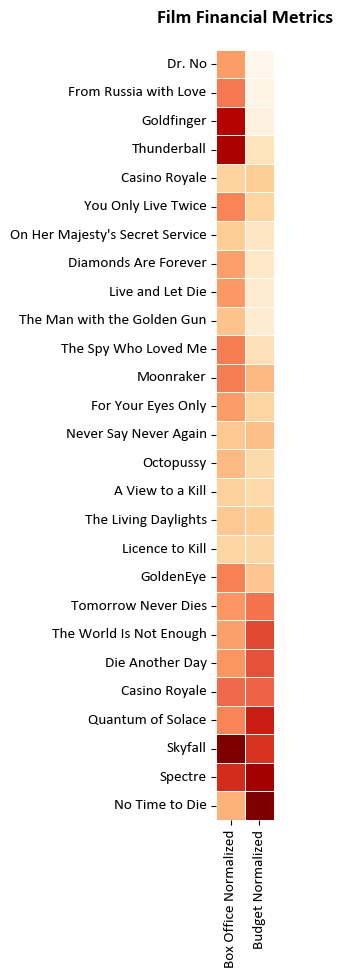

In [52]:
# Definimos el tamaño del gráfico para después ajustarlas con el parámetro 'square'
plt.figure(figsize=(1, 10))

# Ajustamos la relación de aspecto para que las celdas sean cuadradas, sin importar el tamaño de la figura
sns.heatmap(film_values[['Box Office Normalized', 'Budget Normalized']], xticklabels=True, square=True, cbar=False, cmap='OrRd', linecolor='white', linewidths=0.5)

# Añadimos el título al gráfico
plt.title('Film Financial Metrics\n', fontsize=14, fontweight='bold', family='Calibri')
plt.ylabel('')

# Ajustamos la fuente de los ejes
plt.xticks(fontsize=11, family='Calibri')
plt.yticks(fontsize=11, family='Calibri')

# Mostramos el gráfico
plt.show()

### 6.8 - Mapa coroplético
---

Los mapas coropléticos son visualizaciones geográficas en las que distintas regiones (como países, provincias o municipios) se colorean en función de valores. Estos mapas permiten interpretar de manera visual la distribución espacial de estos datos. Aunque principalmente se utilizan para valores numéricos, también pueden aplicarse a categorías en ciertos casos.

Para poder crear estos mapas en Python, es necesario trabajar con GeoDataFrames, una estructura de datos especial proporcionada por la librería GeoPandas que extiende los DataFrames de Pandas. Un GeoDataFrame contiene, además de las columnas, información geográfica como coordenadas, polígonos o geometrías asociadas a cada fila, permitiendo manipular y visualizar datos espaciales fácilmente.

Una de las formas más comunes de obtener un GeoDataFrame es leyendo un archivo shapefile (.shp), un formato ampliamente utilizado para almacenar información geoespacial vectorial. Gracias a la función `gpd.read_file()`, GeoPandas permite cargar directamente estos archivos en un GeoDataFrame.

> ```python
> gpd.read_file('shape_file.shp')
> ```

In [53]:
# Importamos la librería GeoPandas
import geopandas as gpd

In [54]:
# Importamos un GeoDataFrame
gdf_spain_provinces = gpd.read_file('./data/spain_provinces.shp')
gdf_spain_provinces

acom_code                   acom_name prov_code               prov_name  \
0         01                   Andalucía        18                 Granada   
1         01                   Andalucía        21                  Huelva   
2         01                   Andalucía        11                   Cádiz   
3         01                   Andalucía        29                  Málaga   
4         01                   Andalucía        41                 Sevilla   
5         01                   Andalucía        04                 Almería   
6         01                   Andalucía        23                    Jaén   
7         01                   Andalucía        14                 Córdoba   
8         02                      Aragón        22                  Huesca   
9         02                      Aragón        44                  Teruel   
10        02                      Aragón        50                Zaragoza   
11        03      Principado de Asturias        33                Asturias   
12        04              Islas Baleares        07          Islas Baleares   
13        05                    Canarias        38  Santa Cruz de Tenerife   
14        05                    Canarias        35              Las Palmas   
15        06                   Cantabria        39               Cantabria   
16        07             Castilla y León        37               Salamanca   
17        07             Castilla y León        47              Valladolid   
18        07             Castilla y León        49                  Zamora   
19        07             Castilla y León        05                   Ávila   
20        07             Castilla y León        42                   Soria   
21        07             Castilla y León        24                    León   
22        07             Castilla y León        34                Palencia   
23        07             Castilla y León        09                  Burgos   
24        07             Castilla y León        40                 Segovia   
25        08          Castilla-La Mancha        16                  Cuenca   
26        08          Castilla-La Mancha        45                  Toledo   
27        08          Castilla-La Mancha        19             Guadalajara   
28        08          Castilla-La Mancha        02                Albacete   
29        08          Castilla-La Mancha        13             Ciudad Real   
30        09                    Cataluña        25                  Lleida   
31        09                    Cataluña        43               Tarragona   
32        09                    Cataluña        17                  Girona   
33        09                    Cataluña        08               Barcelona   
34        10        Comunidad Valenciana        03                Alicante   
35        10        Comunidad Valenciana        46                Valencia   
36        10        Comunidad Valenciana        12               Castellón   
37        11                 Extremadura        06                 Badajoz   
38        11                 Extremadura        10                 Cáceres   
39        12                     Galicia        36              Pontevedra   
40        12                     Galicia        27                    Lugo   
41        12                     Galicia        15                A Coruña   
42        12                     Galicia        32                 Ourense   
43        13         Comunidad de Madrid        28                  Madrid   
44        14            Región de Murcia        30                  Murcia   
45        15  Comunidad Foral de Navarra        31                 Navarra   
46        16                  País Vasco        48                 Bizkaia   
47        16                  País Vasco        01                   Álava   
48        16                  País Vasco        20                Gipuzkoa   
49        17                    La Rioja        26                La Rioja   
50        18    Ciudad Au

In [55]:
# Comprobamos que es un GeoDataFrame
type(gdf_spain_provinces)

geopandas.geodataframe.GeoDataFrame

👉 El método `.plot()` genera un mapa a partir de las geometrías almacenadas en un GeoDataFrame.

Si no se especifica nada más, simplemente se dibuja una visualización inicial de la estructura geográfica con un color uniforme. 

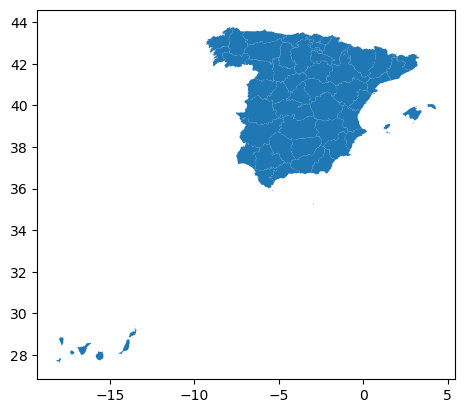

In [56]:
# Representamos los datos geoespaciales del GeoDataFrame
gdf_spain_provinces.plot()
plt.show()

#### Mapa coroplético básico

Para visualizar un mapa coroplético, hay que seguir la siguiente sintaxis, especificando la columna que contiene los valores a representar:

> ```python
> geodataframe_name.plot(column='column_name')
> ```

In [57]:
# Creamos una condición para excluir las provincias fuera de la península
cond = gdf_spain_provinces['acom_name'].isin(['Canarias', 'Islas Baleares', 'Ciudad Autónoma de Ceuta', 'Ciudad Autónoma de Melilla'])

# Filtramos el GeoDataFrame para seleccionar sólo la península
gdf_spain_provinces = gdf_spain_provinces[-cond]

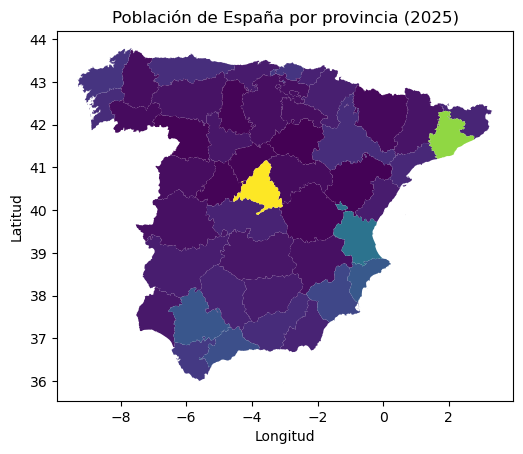

In [58]:
# Creamos un mapa coroplético de las provincias de España según su población
gdf_spain_provinces.plot(column='population')

# Añadimos el título al gráfico y las etiquetas a los ejes
plt.title('Población de España por provincia (2025)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostramos el gráfico
plt.show()

#### Mapa coroplético avanzado

Dentro del método `.plot()`, se pueden usar varios parámetros para personalizar la visualización del mapa. Con `cmap` se define la paleta de colores, mientras que `edgecolor` y `linewidth` permiten ajustar el color y grosor de los bordes entre regiones. 

Además, si se desea incluir una leyenda, se puede activar con `legend=True` y personalizar con `legend_kwds`, que acepta opciones como `'label'` para el título de la leyenda y `'shrink'` para ajustar su tamaño.

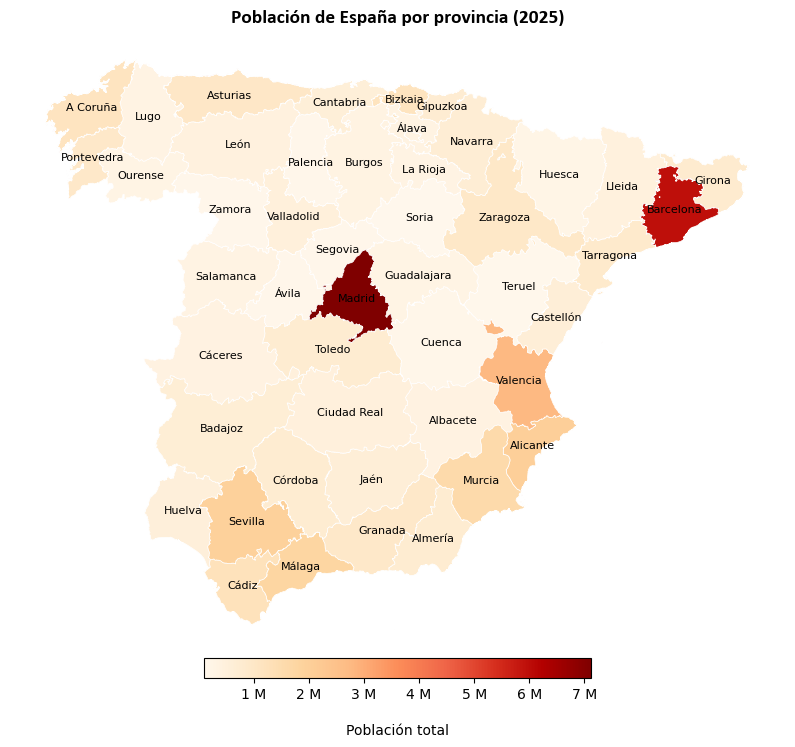

In [59]:
# Creamos una figura y sus ejes para que el gráfico sea más personalizable
fig, ax = plt.subplots(figsize=(10, 15))

# Personalizamos el mapa coroplético
gdf_spain_provinces.plot(column='population', ax=ax, cmap='OrRd', edgecolor='white', linewidth=0.5, 
                         legend=True, legend_kwds={'label':'\nPoblación total',
                                                   'orientation':'horizontal',
                                                   'shrink':0.5,
                                                   'pad':0})

# Añadimos el título al gráfico
ax.set_title('Población de España por provincia (2025)', fontsize=14, fontweight='bold', family='Calibri')

# Ocultamos los ejes
ax.axis('off')

# Etiquetamos cada provincia con su nombre
for idx, row in gdf_spain_provinces.iterrows():
    prov_name = row['prov_name']
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, prov_name,
            fontsize=8, ha='center', va='center', color='black')

# Formateamos las etiquetas de la barra de colores para mostrar los valores en millones
cbar = ax.get_figure().axes[-1]
cbar.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.0f} M'))

# Mostramos el gráfico
plt.show()

👉 Se pueden usar los parámetros `vmin` y `vmax` para fijar manualmente o dinámicamente los valores mínimo y máximo del rango de colores.

### 6.9 - Gráfico de radar
---

Los gráficos de radar, también conocidos como gráficos de araña, visualizan una serie de datos como un conjunto de puntos distribuidos a lo largo de ejes radiales y angulares, cada uno correspondiente a una variable numérica diferente. Los puntos que representan cada valor de la variable se conectan mediante una línea o área cerrada. Cuanto más alejado esté un punto del centro, mayor es su valor.

#### Gráfico de radar básico

Además de Matplotlib y Seaborn, una de las librerías más populares para la visualización de datos es Plotly. A diferencia de otras librerías de visualización, Plotly ofrece gráficos interactivos que permiten al usuario explorar los datos de manera más detallada, como hacer zoom, mover y hacer clic en los elementos visualizados.

Entre los gráficos que ofrece Plotly, se encuentra el de radar. Para crear un gráfico de radar con Plotly, se utiliza la siguiente de sintaxis:

> ```python
> fig = px.line_polar(df, r='value_column', theta='metric_column', color='category_column', line_close=True)
> ```

> ```python
> fig.show()
> ```

In [60]:
# Creamos dos condiciones para seleccionar las filas donde el actor sea 'Pierce Brosnan' o 'Daniel Craig'
cond_pierce = film_values['Actor'] == 'Pierce Brosnan'
cond_craig = film_values['Actor'] == 'Daniel Craig'

# Filtramos para incluir sólo las filas con 'Pierce Brosnan' o 'Daniel Craig' en 'Actor'
actors_metrics = film_values[cond_pierce | cond_craig].reset_index()

In [61]:
# Agrupamos por actor y calculamos la media de las métricas normalizadas
actors_metrics = actors_metrics.groupby('Actor').agg({'Box Office Normalized':'mean', 'Budget Normalized':'mean', 'Bond Actor Salary Normalized':'mean'}).reset_index()
actors_metrics

Actor  Box Office Normalized  Budget Normalized  \
0    Daniel Craig               0.671839           0.821201   
1  Pierce Brosnan               0.499894           0.577849   

   Bond Actor Salary Normalized  
0                      0.482309  
1                      0.649441

In [62]:
# Pivotamos el DataFrame a formato long
actors_metrics = actors_metrics.melt(id_vars=['Actor'], value_vars=['Box Office Normalized', 'Budget Normalized', 'Bond Actor Salary Normalized'], var_name='Metric', value_name='Value Normalized')
actors_metrics

Actor                        Metric  Value Normalized
0    Daniel Craig         Box Office Normalized          0.671839
1  Pierce Brosnan         Box Office Normalized          0.499894
2    Daniel Craig             Budget Normalized          0.821201
3  Pierce Brosnan             Budget Normalized          0.577849
4    Daniel Craig  Bond Actor Salary Normalized          0.482309
5  Pierce Brosnan  Bond Actor Salary Normalized          0.649441

In [63]:
# Importamos Plotly
import plotly.express as px

In [64]:
# Creamos un gráfico de radar para comparar los tres métricas normalizadas
fig = px.line_polar(actors_metrics, r='Value Normalized', theta='Metric', color='Actor', line_close=True)

# Mostrar gráfico
fig.show()

#### Gráfico de radar avanzado

Para añadir o modificar el título del gráfico de radar, `px.line_polar()` cuenta con el parámetro `title`, que permite establecer un título.

Por otra parte, `fig.update_traces(fill='toself')` se utiliza para rellenar el área cerrada que forman las líneas del gráfico de radar.

Además, es posible ajustar el diseño del gráfico de radar con `fig.update_layout()`:

> ```python
> fig.update_layout(
>     # Ajustar el tamaño del gráfico
>     width=graph_width, height=graph_height, 
>     polar={
>         # Personalizar el color del fondo
>         'bgcolor':background_color, 
>         # Personalizar los ejes radiales
>         'radialaxis': {'gridcolor':radial_color, 'showline':False, 'range':[min_level, max_level]}, 
>         # Personalizar el color de los ejes angulares
>         'angularaxis': {'gridcolor':angular_color}})
> ```

In [65]:
# Añadimos el título al gráfico de radar
fig = px.line_polar(actors_metrics, r='Value Normalized', theta='Metric', color='Actor', 
                    line_close=True, title='Financial Metrics of the Latest James Bond Films')

# Rellenamos el área bajo las líneas
fig.update_traces(fill='toself')

# Ajustamos el tamaño, el color y las líneas del gráfico
fig.update_layout(width=900, height=600,
                  polar={'bgcolor':'white',
                         'radialaxis': {'gridcolor':'grey', 'showline':False, 'range':[0, 1.1]},
                         'angularaxis': {'gridcolor':'grey'}})

# Mostramos el gráfico
fig.show()

### 6.10 - Nube de palabras
---

Las nubes de palabras (o word clouds) son visualizaciones que muestran las palabras más frecuentes en un conjunto de texto. El tamaño de cada palabra en la nube refleja la cantidad de veces que aparece en el texto: las palabras más frecuentes se muestran en un tamaño mayor, mientras que las menos frecuentes aparecen más pequeñas.

#### Nube de palabras básica

Para crear una nube de palabras en Python, es necesario utilizar una librería especializada como WordCloud.

En primer lugar, se debe proporcionar un conjunto de texto a la función `generate()`, que procesa el texto y genera una imagen con las palabras más frecuentes. Posteriormente, se puede visualizar la nube utilizando `plt.imshow()` de Matplotlib.

> ```python
> plt.imshow(WordCloud().generate(text))
> ```

In [66]:
# Importamos WoldCloud
from wordcloud import WordCloud

In [67]:
# Separamos todas las palabras contenidas en 'Film' y las concatena en un solo texto
film_text = " ".join(df_jamesbond['Film'])
film_text

"Dr. No From Russia with Love Goldfinger Thunderball Casino Royale You Only Live Twice On Her Majesty's Secret Service Diamonds Are Forever Live and Let Die The Man with the Golden Gun The Spy Who Loved Me Moonraker For Your Eyes Only Never Say Never Again Octopussy A View to a Kill The Living Daylights Licence to Kill GoldenEye Tomorrow Never Dies The World Is Not Enough Die Another Day Casino Royale Quantum of Solace Skyfall Spectre No Time to Die"

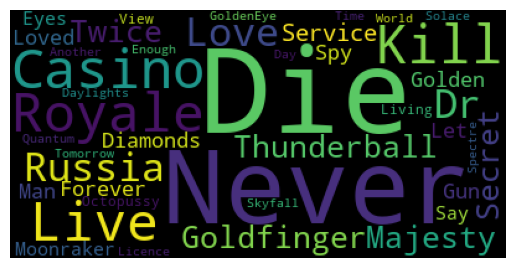

In [68]:
# Creamos una nube de palabras con el texto generado
wordcloud = WordCloud().generate(film_text)

# Mostramos la nube de palabras
plt.imshow(wordcloud)

# Ocultamos los ejes
plt.axis('off')

# Mostramos el gráfico
plt.show()

#### Nube de palabras avanzada

Dentro de la función `WordCloud()`, se pueden especificar el tamaño del gráfico, el color de fondo y el mapa de colores de las palabras mediante sus parámetros correspondientes.

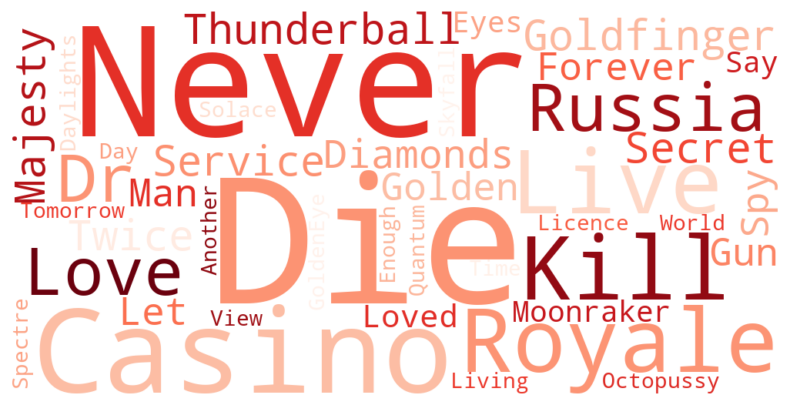

In [69]:
# Personalizamos los parámetros de la nube de palabras
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Reds').generate(film_text)

# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')

# Ocultamos los ejes
plt.axis('off')

# Mostramos el gráfico
plt.show()

### 6.11 - Combinación de gráficos
---

A la hora de visualizar datos, a menudo surge la necesidad de combinar diferentes tipos de gráficos en una misma visualización. La combinación de gráficos puede lograrse fácilmente utilizando *subplots*, una funcionalidad que permite organizar varios gráficos en filas y columnas dentro de una misma figura. 

En Matplotlib, los *subplots* se generan mediante la función `plt.subplots()`

> ```python
> fig, ax = plt.subplots(num_rows, num_columns, figsize=(width, height))
> ```

Una vez que los ejes han sido creados, se pueden asignar los subgráficos a cada uno de ellos utilizando `ax`:

> ```python
> sns.seaborn_graph(df, x='column_1', y='column_2', ax=ax[0, 0])
> ```

> ```python
> ...
> ```

> ```python
> ax[num_rows, num_columns].matplotlib_graph(df['column_1'], df['column_2'])
> ```

⚠️ Es importante destacar que `ax` se utiliza de manera diferente según la librería utilizada. En el caso de Matplotlib, se pasa directamente a las funciones de visualización para indicar en qué subgráfico del *subplot* se dibuja el gráfico. Por otro lado, en Seaborn es necesario especificarlo como argumento a la función de visualización a través del parámetro `ax`, para asignar el gráfico al subgráfico correspondiente.

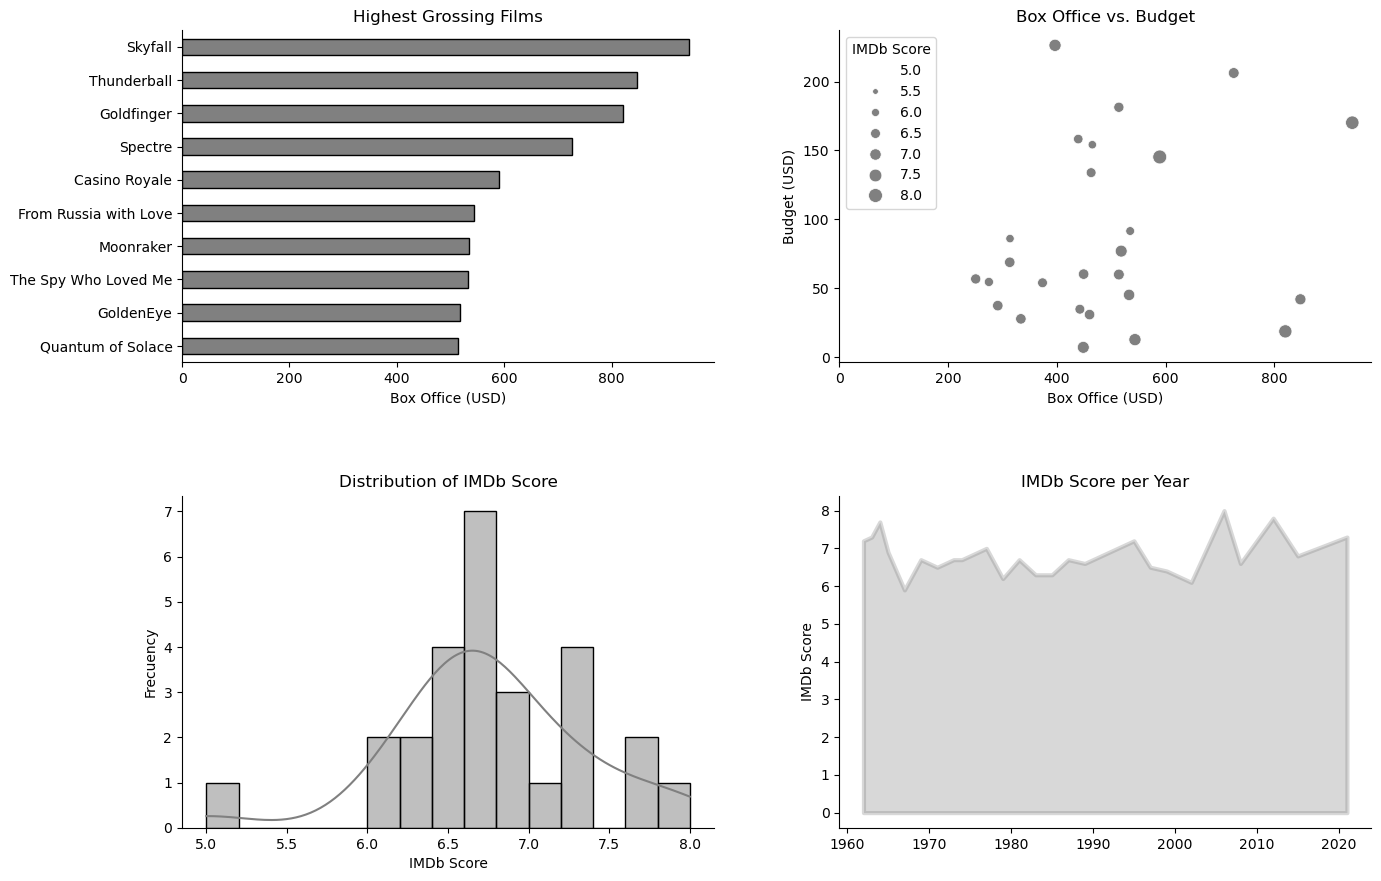

In [70]:
# Creamos un subplot de 2x2
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Gráfico de barras
sns.barplot(df_jamesbond.sort_values('Box Office', ascending=False).head(10), x='Box Office', y='Film', color='grey', edgecolor='black', width=0.5, ax=ax[0,0])
ax[0,0].set(title='Highest Grossing Films', xlabel='Box Office (USD)', ylabel='')

# Gráfico 2: Gráfico de dispersión
sns.scatterplot(df_jamesbond, x='Box Office', y='Budget', size='IMDb Score', sizes=(0, 100), color='grey', ax=ax[0,1])
ax[0,1].set(title='Box Office vs. Budget', xlabel='Box Office (USD)', ylabel='Budget (USD)', xlim=(0))

# Gráfico 3: Histograma
sns.histplot(df_jamesbond['IMDb Score'], kde=True, bins=15, color='grey', ax=ax[1,0])
ax[1,0].set(title='Distribution of IMDb Score', xlabel='IMDb Score', ylabel='Frecuency')

# Gráfico 4: Gráfico de área
ax[1,1].fill_between(yearly_score['Year'], yearly_score['IMDb Score'], color='grey', alpha=0.3, linewidth=3)
ax[1,1].set(title='IMDb Score per Year', xlabel='', ylabel='IMDb Score')

# Ajustamos el espacio entre subplots
plt.tight_layout(pad=5)

# Eliminamos el borde superior y derecho
sns.despine()

# Mostrar el gráfico
plt.show()

### 6.12 - Exportar gráficos
---

#### Exportar gráficos como imagen

Para exportar un gráfico generado en el entorno, se pueden utilizar los métodos `.get_figure()` y `.savefig()`. Al anidarlos, el gráfico se guarda como una imagen en el directorio especificado.

> ```python
> fig.get_figure().savefig('./path/file_name.png', bbox_inches='tight', transparent=True/False)
> ```

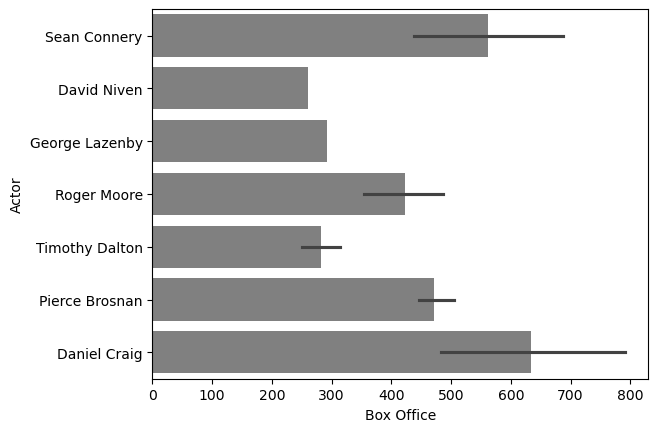

In [71]:
# Creamos un gráfico de barras
fig = sns.barplot(df_jamesbond, x='Box Office', y='Actor', color='grey')

# Exportamos el gráfico generando la figura con '.get_figure()' y luego guardándola con '.savefig()'
fig.get_figure().savefig('my_chart_1.png', bbox_inches='tight')

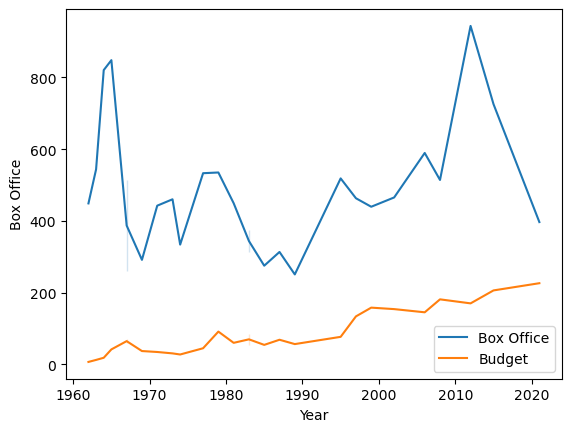

In [72]:
# Creamos una figura para un gráfico
fig, ax = plt.subplots()

# Creamos un gráfico de múltiples líneas en el mismo 'ax'
sns.lineplot(data=df_jamesbond, x='Year', y='Box Office', label='Box Office', ax=ax)
sns.lineplot(data=df_jamesbond, x='Year', y='Budget', label='Budget', ax=ax)

# Guardamos el gráfico
fig.get_figure().savefig('my_chart_2.png', bbox_inches='tight')

#### Exportar gráficos como PDF

La librería FPDF permite generar un documento en PDF de manera programática. Proporciona funcionalidades que permiten agregar texto, imágenes, tablas y otros elementos gráficos a un PDF, todo desde código de Python. Además, mediante FPDF, se pueden exportar gráficos generados con librerías como Matplotlib o Seaborn directamente a un documento PDF.


> ```python
> my_pdf = FPDF() # Crear un documento PDF
> ```

> ```python
> my_pdf.add_page() # Agregar una página al documento
> ```

> ```python
> my_pdf.set_font(family=font_family, style=font_style, size=font_style) # Configurar la fuente
> my_pdf.cell(txt='Text', w=cell_width, h=cell_height) # Agregar texto al documento
> ```

> ```python
> my_pdf.image('image_name.png', type='', w=image_width) # Agregar imagen al documento
> ```


> ```python
> my_pdf.output('report_name.pdf') # Exportar el archivo PDF
> ```

In [73]:
# Importamos la librería FPDF
from fpdf import FPDF

In [74]:
# Creamos un documento PDF vacío
my_pdf = FPDF()

# Agregamos una primer página en blanco
my_pdf.add_page()

# Agregamos un título para el documento
my_pdf.set_font(family='Arial', style='B', size=16) # Establecemos la fuente
my_pdf.cell(txt='My Report', w=0, h=10, align='C', border=1, ln=True) # Insertamos el título

# Exportamos el documento en el directorio actual
my_pdf.output('my_report_1.pdf')

''

In [75]:
# Creamos un documento PDF vacío
my_pdf = FPDF()

# Agregamos una primer página en blanco
my_pdf.add_page()

# Agregamos un título para el documento
my_pdf.set_font('Arial', 'B', 16) # Establecemos la fuente
my_pdf.cell(txt='My Report', w=0, h=10, align='C', border=1, ln=True) # Insertamos el título

# Definimos el ancho de la imagen
image_width = 180
# Calculamos la coordenada x para centrar la imagen
x_center = (my_pdf.w - image_width) / 2

# Insertamos la imagen de un gráfico en el documento
my_pdf.image('my_chart_2.png', type='', w=image_width, x=x_center, y=30)

# Exportamos el documento en el directorio actual
my_pdf.output('my_report_2.pdf')

''

In [76]:
# Creamos un documento PDF vacío
my_pdf = FPDF()

# Agregamos una primer página en blanco
my_pdf.add_page()

# Agregamos un título para el documento
my_pdf.set_font('Arial', 'B', 16) # Establecemos la fuente
my_pdf.cell(txt='My Report', w=0, h=10, align='C', border=1, ln=True) # Insertamos el título

# Definimos el ancho de la imagen
image_width = 180
# Calculamos la coordenada x para centrar la imagen
x_center = (my_pdf.w - image_width) / 2

# Insertamos la imagen de un gráfico en el documento
my_pdf.image('my_chart_2.png', type='', w=image_width, x=x_center, y=30)

# Definimos textos para añadir al documento
txt_1 = f'AVG Box Office: ${df_jamesbond['Box Office'].mean().round(2)}M'
txt_2 = f'AVG Budget: ${df_jamesbond['Budget'].mean().round(2)}M'

# Agregamos las celdas de texto al documento
my_pdf.set_font('Arial', '', 10) # Establecemos la fuente
my_pdf.set_y(170) # Movemos la posición vertical para insertar los textos
my_pdf.cell(txt=txt_1, w=0, h=10, align='L', ln=True) # Insertamos el primer texto
my_pdf.cell(txt=txt_2, w=0, h=10, align='L', ln=True) # Insertamos el segundo texto

# Exportamos el documento en el directorio actual
my_pdf.output('my_report_3.pdf')

''

### 6.13 - Ejercicios
---

📘 Puedes encontrar las soluciones a los ejercicios [aquí](https://github.com/jorgeggalvan/Data-Analysis-Fundamentals-with-Python/blob/main/Python_Data_Analysis_6.2_Exercises.ipynb).

#### Ejercicio 6.1

> Dataset a utilizar: `star_wars.csv`

**6.1A:** Crea un gráfico de barras que muestre los 10 planetas ('Homeworld') con más personajes en el conjunto de datos.

**6.1B:** Incluye etiquetas en las barras que indiquen el número de personajes correspondientes a cada planeta.

##### Ejercicio 6.1A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 6.1B

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 6.2

> Dataset a utilizar: `fortune_1000.csv`

Visualiza con un gráfico de barras horizontales el cambio en el ranking de las empresas del sector 'Media', ordenando las barras de mayor a menor según el cambio.

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 6.3

> Dataset a utilizar: `amzn_stock.csv`

Crea un gráfico que muestre la media de cotización del cierre semanal de las acciones de Amazon en 2020, incluyendo una línea vertical en la semana 12 para señalar la fecha del inicio del confinamiento en Estados Unidos debido a la pandemia del COVID-19.

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 6.4

> Datasets a utilizar: `amzn_stock.csv` & `aapl_stock_2024.csv`

**6.4A:** Representa una serie temporal con un gráfico de dos líneas que muestre la cotización de cierre de Amazon y Apple durante el año 2024.

**6.4B:** Añade al gráfico el nombre de cada empresa al final de su respectiva serie.

##### Ejercicio 6.4A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 6.4B

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 6.5

> Dataset a utilizar: `imdb_movies.csv`

Crea un gráfico de dispersión para visualizar la relación entre la puntuación en IMDb y el presupuesto de las películas, utilizando únicamente las películas de los tres directores con más películas y diferenciando a estos mediante colores.

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 6.6

> Dataset a utilizar: `imdb_movies.csv`

Repite el ejercicio anterior, pero esta vez separando las películas por director en gráficos independientes. Incluye un cuarto director según cantidad total de películas.

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 6.7

> Dataset a utilizar: `world_countries.csv`

**6.7A:** Visualiza un gráfico de burbujas que muestre la relación entre las siguientes variables para cada continente:

- Eje x: promedio del Producto Interno Bruto (PIB).
- Eje y: promedio de la esperanza de vida.
- Tamaño de la burbuja: total de la población.

**6.7B:** Añade el nombre de cada continente en su respectiva burbuja.

##### Ejercicio 6.7A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 6.7B

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 6.8

> Dataset a utilizar: `amzn_stock.csv`

Visualiza el volumen medio histórico de transacciones semanales de Amazon utilizando un mapa de calor.

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 6.9

> Dataset a utilizar: `laliga_results.csv`

Crea un mapa de calor donde las filas correspondan a los 20 equipos de LaLiga y las columnas representen los goles de cada jornada. El valor de cada celda debe indicar el número de goles anotados por cada equipo en cada jornada.

In [ ]:
# Escribe la solución al ejercicio aquí